In [1]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import datetime as dt

----
### Import CSVs from Whoop

In [2]:
physio = pd.read_csv(r'/Users/tinym/Desktop/my_whoop_data_2022_11_28/physiological_cycles.csv')

In [3]:
physio.columns

Index(['Cycle start time', 'Cycle end time', 'Cycle timezone',
       'Recovery score %', 'Resting heart rate (bpm)',
       'Heart rate variability (ms)', 'Skin temp (celsius)', 'Blood oxygen %',
       'Day Strain', 'Energy burned (cal)', 'Max HR (bpm)', 'Average HR (bpm)',
       'Sleep onset', 'Wake onset', 'Sleep performance %',
       'Respiratory rate (rpm)', 'Asleep duration (min)',
       'In bed duration (min)', 'Light sleep duration (min)',
       'Deep (SWS) duration (min)', 'REM duration (min)',
       'Awake duration (min)', 'Sleep need (min)', 'Sleep debt (min)',
       'Sleep efficiency %'],
      dtype='object')

In [4]:
physio.head()

,Cycle start time,Cycle end time,Cycle timezone,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),...,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %
0,2022-11-28 01:03:57,NaN,UTC+01:00,65.0,61.0,56.0,33.20,97.67,NaN,NaN,...,13.2,402.0,427.0,219.0,90.0,93.0,25.0,528.0,56.0,96.0
1,2022-11-27 03:18:18,2022-11-28 01:03:57,UTC+01:00,36.0,65.0,47.0,33.74,95.24,5.0,1740.0,...,13.4,413.0,447.0,218.0,88.0,107.0,34.0,543.0,46.0,92.0
2,2022-11-26 03:51:55,2022-11-27 03:18:18,UTC+01:00,42.0,61.0,50.0,33.60,97.17,13.5,2651.0,...,13.5,426.0,464.0,187.0,109.0,130.0,38.0,535.0,30.0,92.0
3,2022-11-25 03:24:54,2022-11-26 03:51:55,UTC+01:00,45.0,58.0,52.0,33.90,97.07,14.8,2984.0,...,13.0,435.0,512.0,200.0,107.0,128.0,77.0,500.0,23.0,85.0
4,2022-11-24 03:17:20,2022-11-25 03:24:54,UTC+01:00,53.0,59.0,56.0,32.10,98.25,8.2,2121.0,...,13.2,470.0,522.0,244.0,111.0,115.0,52.0,523.0,51.0,90.0


In [5]:
physio.shape

(679, 25)

In [6]:
sleep = pd.read_csv(r'/Users/tinym/Desktop/my_whoop_data_2022_11_28/sleeps.csv')

In [7]:
sleep.shape

(712, 17)

In [8]:
sleep.head()

,Cycle start time,Cycle end time,Cycle timezone,Sleep onset,Wake onset,Sleep performance %,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Nap
0,2022-11-28 01:03:57,NaN,UTC+01:00,2022-11-28 01:03:57,2022-11-28 08:11:16,76.0,13.2,402.0,427.0,219.0,90.0,93.0,25.0,528.0,56.0,96.0,False
1,2022-11-27 03:18:18,2022-11-28 01:03:57,UTC+01:00,2022-11-27 03:18:18,2022-11-27 10:52:02,76.0,13.4,413.0,447.0,218.0,88.0,107.0,34.0,543.0,46.0,92.0,False
2,2022-11-26 03:51:55,2022-11-27 03:18:18,UTC+01:00,2022-11-26 03:51:55,2022-11-26 11:36:43,80.0,13.5,426.0,464.0,187.0,109.0,130.0,38.0,535.0,30.0,92.0,False
3,2022-11-25 03:24:54,2022-11-26 03:51:55,UTC+01:00,2022-11-25 03:24:54,2022-11-25 11:58:44,87.0,13.0,435.0,512.0,200.0,107.0,128.0,77.0,500.0,23.0,85.0,False
4,2022-11-24 03:17:20,2022-11-25 03:24:54,UTC+01:00,2022-11-24 03:17:20,2022-11-24 11:59:53,90.0,13.2,470.0,522.0,244.0,111.0,115.0,52.0,523.0,51.0,90.0,False


In [9]:
workout = pd.read_csv(r'/Users/tinym/Desktop/my_whoop_data_2022_11_28/workouts.csv')

In [10]:
workout.shape

(133, 20)

In [11]:
workout.dtypes

Cycle start time             object
Cycle end time               object
Cycle timezone               object
Workout start time           object
Workout end time             object
Duration (min)                int64
Activity name                object
Activity Strain             float64
Energy burned (cal)         float64
Max HR (bpm)                float64
Average HR (bpm)            float64
HR Zone 1 %                 float64
HR Zone 2 %                 float64
HR Zone 3 %                 float64
HR Zone 4 %                 float64
HR Zone 5 %                 float64
GPS enabled                    bool
Distance (meters)           float64
Altitude gain (meters)      float64
Altitude change (meters)    float64
dtype: object

<AxesSubplot: >

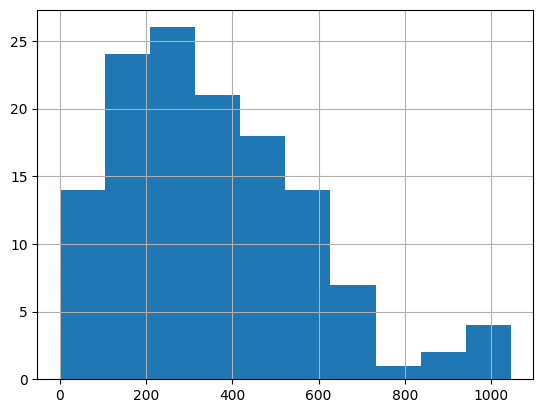

In [12]:
workout['Energy burned (cal)'].hist(bins=10)

In [13]:
workout.loc[workout['Activity name'] == 'Surfing'].head()

,Cycle start time,Cycle end time,Cycle timezone,Workout start time,Workout end time,Duration (min),Activity name,Activity Strain,Energy burned (cal),Max HR (bpm),Average HR (bpm),HR Zone 1 %,HR Zone 2 %,HR Zone 3 %,HR Zone 4 %,HR Zone 5 %,GPS enabled,Distance (meters),Altitude gain (meters),Altitude change (meters)
116,2020-05-22 03:10:50,2020-05-23 00:03:00,UTC-04:00,2020-05-22 15:54:41,2020-05-22 16:20:52,26,Surfing,9.2,287.0,174.0,147.0,0.0,2.0,14.0,49.0,33.0,False,NaN,NaN,NaN


In [14]:
workout.head(10)

,Cycle start time,Cycle end time,Cycle timezone,Workout start time,Workout end time,Duration (min),Activity name,Activity Strain,Energy burned (cal),Max HR (bpm),Average HR (bpm),HR Zone 1 %,HR Zone 2 %,HR Zone 3 %,HR Zone 4 %,HR Zone 5 %,GPS enabled,Distance (meters),Altitude gain (meters),Altitude change (meters)
0,2022-11-25 03:24:54,2022-11-26 03:51:55,UTC+01:00,2022-11-26 01:33:32,2022-11-26 02:02:47,29,Activity,8.4,284.0,159.0,140.0,0.0,1.0,35.0,62.0,0.0,False,NaN,NaN,NaN
1,2022-11-10 00:48:31,2022-11-10 23:39:33,UTC+01:00,2022-11-10 16:31:49,2022-11-10 17:20:04,48,Functional Fitness,8.3,335.0,172.0,127.0,0.0,16.0,60.0,18.0,4.0,False,NaN,NaN,NaN
2,2022-11-08 23:48:24,2022-11-10 00:48:31,UTC+01:00,2022-11-09 16:00:00,2022-11-09 17:00:00,60,Functional Fitness,9.7,431.0,188.0,128.0,0.0,22.0,49.0,20.0,5.0,False,NaN,NaN,NaN
3,2022-11-05 03:03:31,2022-11-06 00:38:48,UTC+01:00,2022-11-05 14:20:53,2022-11-05 15:35:49,74,Weightlifting,12.2,674.0,169.0,137.0,0.0,3.0,40.0,52.0,2.0,False,NaN,NaN,NaN
4,2022-10-29 00:19:26,2022-10-30 01:33:11,UTC+02:00,2022-10-29 19:58:53,2022-10-29 20:50:06,51,Running,11.2,475.0,191.0,138.0,0.0,3.0,41.0,31.0,20.0,False,NaN,NaN,NaN
5,2022-10-22 02:50:19,2022-10-23 03:18:23,UTC+02:00,2022-10-22 21:56:35,2022-10-22 22:45:51,49,Activity,10.2,445.0,172.0,138.0,1.0,3.0,28.0,57.0,8.0,False,NaN,NaN,NaN
6,2022-10-18 01:04:41,2022-10-19 00:35:54,UTC+02:00,2022-10-18 20:42:31,2022-10-18 21:44:56,62,Functional Fitness,11.4,531.0,187.0,137.0,0.0,17.0,22.0,44.0,14.0,False,NaN,NaN,NaN
7,2022-10-17 00:07:54,2022-10-18 01:04:41,UTC+02:00,2022-10-17 21:08:16,2022-10-17 21:26:59,18,Running,7.5,184.0,181.0,143.0,0.0,4.0,25.0,34.0,31.0,True,1891.35,40.24,-2.75
8,2022-10-03 02:02:48,2022-10-04 01:43:57,UTC+01:00,2022-10-03 20:06:00,2022-10-03 20:37:35,31,Cycling,8.7,308.0,166.0,141.0,0.0,4.0,14.0,77.0,3.0,False,NaN,NaN,NaN
9,2022-09-07 01:15:28,2022-09-07 23:59:02,UTC+03:00,2022-09-07 18:16:56,2022-09-07 19:21:37,64,Swimming,10.8,540.0,169.0,135.0,0.0,3.0,38.0,53.0,3.0,False,NaN,NaN,NaN


----
### Import XMLs from Apple Health

In [15]:
# create element tree object 
tree = ET.parse(r'/Users/tinym/Desktop/apple_health_export/export.xml') 

# for every health record, extract the attributes into a dictionary (columns). Then create a list (rows).
root = tree.getroot()

In [16]:
record_list = [x.attrib for x in root.iter('Record')]

# create DataFrame from a list (rows) of dictionaries (columns)
data = pd.DataFrame(record_list)

# proper type to dates
for col in ['creationDate', 'startDate', 'endDate']:
    data[col] = pd.to_datetime(data[col])

# value is numeric, NaN if fails
data['value'] = pd.to_numeric(data['value'], errors='coerce')


In [17]:
# some records do not measure anything, just count occurences
# filling with 1.0 (= one time) makes it easier to aggregate
data['value'] = data['value'].fillna(1.0)

# shorter observation names
data['type'] = data['type'].str.replace('HKQuantityTypeIdentifier', '')
data['type'] = data['type'].str.replace('HKCategoryTypeIdentifier', '')
data.head()


,type,sourceName,sourceVersion,device,unit,creationDate,startDate,endDate,value
0,BodyMassIndex,FitTrack,1590,"<<HKDevice: 0x2815a18b0>, name:ios, manufactur...",count,2022-02-19 18:56:11+01:00,2022-02-19 18:56:10+01:00,2022-02-19 18:56:10+01:00,23.6000
1,BodyMassIndex,FitTrack,1590,"<<HKDevice: 0x2815a18b0>, name:ios, manufactur...",count,2022-02-19 18:56:11+01:00,2022-02-19 18:56:10+01:00,2022-02-19 18:56:10+01:00,23.6000
2,BodyMassIndex,FitTrack,1590,"<<HKDevice: 0x2815a18b0>, name:ios, manufactur...",count,2022-02-19 18:56:11+01:00,2022-02-19 18:56:10+01:00,2022-02-19 18:56:10+01:00,23.6000
3,BodyMassIndex,Lifesum,1,NaN,count,2022-06-16 18:27:17+01:00,2022-06-16 13:22:23+01:00,2022-06-16 13:22:23+01:00,24.1478
4,Height,JEFIT,1449,NaN,ft,2020-02-25 07:25:44+01:00,2020-02-25 07:25:44+01:00,2020-02-25 07:25:44+01:00,5.8750


In [18]:
data.type.unique()

array(['BodyMassIndex', 'Height', 'BodyMass', 'HeartRate',
       'OxygenSaturation', 'RespiratoryRate', 'BodyFatPercentage',
       'LeanBodyMass', 'StepCount', 'DistanceWalkingRunning',
       'BasalEnergyBurned', 'ActiveEnergyBurned', 'FlightsClimbed',
       'DietaryFatTotal', 'DietaryFatMonounsaturated',
       'DietaryFatSaturated', 'DietaryCholesterol', 'DietarySodium',
       'DietaryCarbohydrates', 'DietaryFiber', 'DietarySugar',
       'DietaryEnergyConsumed', 'DietaryProtein', 'DietaryVitaminA',
       'DietaryVitaminB6', 'DietaryVitaminC', 'DietaryVitaminD',
       'DietaryVitaminE', 'DietaryVitaminK', 'DietaryCalcium',
       'DietaryIron', 'DietaryThiamin', 'DietaryRiboflavin',
       'DietaryNiacin', 'DietaryPhosphorus', 'DietaryMagnesium',
       'DietaryZinc', 'DietarySelenium', 'DietaryCopper',
       'DietaryManganese', 'DietaryPotassium', 'RestingHeartRate',
       'HeadphoneAudioExposure', 'WalkingDoubleSupportPercentage',
       'WalkingSpeed', 'WalkingStepLength'

In [19]:
hr = data.loc[data.type == 'HeartRate']

In [20]:
hr.shape

(1960018, 9)

In [21]:
hr.dtypes

type                                           object
sourceName                                     object
sourceVersion                                  object
device                                         object
unit                                           object
creationDate     datetime64[ns, pytz.FixedOffset(60)]
startDate        datetime64[ns, pytz.FixedOffset(60)]
endDate          datetime64[ns, pytz.FixedOffset(60)]
value                                         float64
dtype: object

In [22]:
hr.sort_values(by='value', ascending=False).tail(50)

,type,sourceName,sourceVersion,device,unit,creationDate,startDate,endDate,value
1147442,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281589d60>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:49:36+01:00,2021-10-07 09:49:35+01:00,2021-10-07 09:49:35+01:00,46.0
1147852,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281588500>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:55:03+01:00,2021-10-07 09:55:03+01:00,2021-10-07 09:55:03+01:00,46.0
1147853,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281588500>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:55:05+01:00,2021-10-07 09:55:04+01:00,2021-10-07 09:55:04+01:00,46.0
1147854,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281588500>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:55:05+01:00,2021-10-07 09:55:04+01:00,2021-10-07 09:55:04+01:00,46.0
1147855,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281588500>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:55:06+01:00,2021-10-07 09:55:05+01:00,2021-10-07 09:55:05+01:00,46.0
1147856,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281588500>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:55:06+01:00,2021-10-07 09:55:06+01:00,2021-10-07 09:55:06+01:00,46.0
1147857,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281588500>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:55:08+01:00,2021-10-07 09:55:07+01:00,2021-10-07 09:55:07+01:00,46.0
1147441,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281589d60>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:49:34+01:00,2021-10-07 09:49:34+01:00,2021-10-07 09:49:34+01:00,46.0
1147440,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281589d60>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:49:34+01:00,2021-10-07 09:49:33+01:00,2021-10-07 09:49:33+01:00,46.0
1147439,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281589d60>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:49:33+01:00,2021-10-07 09:49:32+01:00,2021-10-07 09:49:32+01:00,46.0


In [23]:
start = dt.datetime(2022,8,20,18,7,59)
finish = dt.datetime(2022,8,20,19,47,59)

In [24]:
start = dt.datetime(2021,10,7, 9,25,26)
finish = dt.datetime(2021,10,7, 10,2,26)

In [25]:
hr.startDate = hr.startDate.dt.tz_localize(None)

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_23844/1934293147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr.startDate = hr.startDate.dt.tz_localize(None)


In [26]:
hr.loc[(hr.startDate >= np.datetime64(start)) & (hr.startDate <= np.datetime64(finish))]

,type,sourceName,sourceVersion,device,unit,creationDate,startDate,endDate,value
1145631,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281588820>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:25:27+01:00,2021-10-07 09:25:26,2021-10-07 09:25:26+01:00,52.0
1145632,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281588820>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:25:27+01:00,2021-10-07 09:25:27,2021-10-07 09:25:27+01:00,52.0
1145633,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281588820>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:25:29+01:00,2021-10-07 09:25:28,2021-10-07 09:25:28+01:00,52.0
1145634,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281588820>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:25:29+01:00,2021-10-07 09:25:28,2021-10-07 09:25:28+01:00,52.0
1145635,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x281588820>, name:WHOOP 3A097270,...",count/min,2021-10-07 09:25:30+01:00,2021-10-07 09:25:29,2021-10-07 09:25:29+01:00,52.0
...,...,...,...,...,...,...,...,...,...
1148402,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x28158bd40>, name:WHOOP 3A097270,...",count/min,2021-10-07 10:02:24+01:00,2021-10-07 10:02:23,2021-10-07 10:02:23+01:00,58.0
1148403,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x28158bd40>, name:WHOOP 3A097270,...",count/min,2021-10-07 10:02:24+01:00,2021-10-07 10:02:23,2021-10-07 10:02:23+01:00,58.0
1148404,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x28158bd40>, name:WHOOP 3A097270,...",count/min,2021-10-07 10:02:25+01:00,2021-10-07 10:02:24,2021-10-07 10:02:24+01:00,58.0
1148405,HeartRate,Panagiotis Syrgkanis’s iPhone,14.7.1,"<<HKDevice: 0x28158bd40>, name:WHOOP 3A097270,...",count/min,2021-10-07 10:02:25+01:00,2021-10-07 10:02:25,2021-10-07 10:02:25+01:00,58.0


<AxesSubplot: >

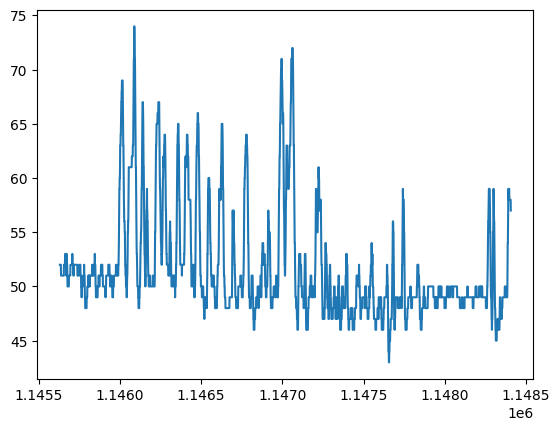

In [27]:
hr.loc[(hr.startDate >= np.datetime64(start)) & (hr.startDate <= np.datetime64(finish))].value.plot()

In [28]:
steps = data.loc[data.type == 'StepCount']

In [29]:
steps.head()

,type,sourceName,sourceVersion,device,unit,creationDate,startDate,endDate,value
1960500,StepCount,Panagiotis Syrgkanis’s iPhone,10.0.2,"<<HKDevice: 0x2815ee350>, name:iPhone, manufac...",count,2016-11-10 03:07:35+01:00,2016-11-10 02:28:43+01:00,2016-11-10 02:37:22+01:00,90.0
1960501,StepCount,Panagiotis Syrgkanis’s iPhone,10.0.2,"<<HKDevice: 0x2815ee350>, name:iPhone, manufac...",count,2016-11-10 07:07:23+01:00,2016-11-10 06:34:20+01:00,2016-11-10 06:40:58+01:00,8.0
1960502,StepCount,Panagiotis Syrgkanis’s iPhone,10.0.2,"<<HKDevice: 0x2815ee350>, name:iPhone, manufac...",count,2016-11-10 07:07:23+01:00,2016-11-10 06:41:21+01:00,2016-11-10 06:50:20+01:00,136.0
1960503,StepCount,Panagiotis Syrgkanis’s iPhone,10.0.2,"<<HKDevice: 0x2815ee350>, name:iPhone, manufac...",count,2016-11-10 07:07:23+01:00,2016-11-10 06:50:20+01:00,2016-11-10 07:00:18+01:00,120.0
1960504,StepCount,Panagiotis Syrgkanis’s iPhone,10.0.2,"<<HKDevice: 0x2815ee350>, name:iPhone, manufac...",count,2016-11-10 08:05:01+01:00,2016-11-10 07:00:18+01:00,2016-11-10 07:10:16+01:00,221.0


In [30]:
data.sourceName.unique()

array(['FitTrack', 'Lifesum', 'JEFIT', 'Panagiotis Syrgkanis’s iPhone',
       'Health', 'StrongLifts', 'iPhone', 'WHOOP', 'Freeletics',
       'Mealime', 'Clock', 'Pillow', 'Flow', 'FitMind'], dtype=object)

*** 
### Processing Steps 

In [31]:
steps.creationDate = steps.creationDate.dt.date

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_23844/1024043245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steps.creationDate = steps.creationDate.dt.date


In [32]:
steps.head()

,type,sourceName,sourceVersion,device,unit,creationDate,startDate,endDate,value
1960500,StepCount,Panagiotis Syrgkanis’s iPhone,10.0.2,"<<HKDevice: 0x2815ee350>, name:iPhone, manufac...",count,2016-11-10,2016-11-10 02:28:43+01:00,2016-11-10 02:37:22+01:00,90.0
1960501,StepCount,Panagiotis Syrgkanis’s iPhone,10.0.2,"<<HKDevice: 0x2815ee350>, name:iPhone, manufac...",count,2016-11-10,2016-11-10 06:34:20+01:00,2016-11-10 06:40:58+01:00,8.0
1960502,StepCount,Panagiotis Syrgkanis’s iPhone,10.0.2,"<<HKDevice: 0x2815ee350>, name:iPhone, manufac...",count,2016-11-10,2016-11-10 06:41:21+01:00,2016-11-10 06:50:20+01:00,136.0
1960503,StepCount,Panagiotis Syrgkanis’s iPhone,10.0.2,"<<HKDevice: 0x2815ee350>, name:iPhone, manufac...",count,2016-11-10,2016-11-10 06:50:20+01:00,2016-11-10 07:00:18+01:00,120.0
1960504,StepCount,Panagiotis Syrgkanis’s iPhone,10.0.2,"<<HKDevice: 0x2815ee350>, name:iPhone, manufac...",count,2016-11-10,2016-11-10 07:00:18+01:00,2016-11-10 07:10:16+01:00,221.0


In [33]:
stepsByDate = steps[['creationDate', 'value']].groupby('creationDate').sum()

In [34]:
stepsByDate.head()

,value
creationDate,
2016-11-10,5423.0
2016-11-11,8890.0
2016-11-12,6909.0
2016-11-13,577.0
2016-11-14,4366.0


In [35]:
type(stepsByDate)

pandas.core.frame.DataFrame

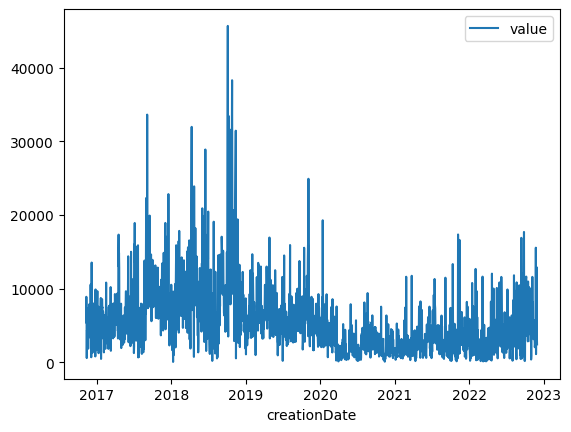

In [36]:
stepsByDate.plot();

***
### Processing physio

In [37]:
physio["Date"] = pd.to_datetime(physio['Wake onset']).dt.date

In [38]:
physio.head()

,Cycle start time,Cycle end time,Cycle timezone,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),...,Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Date
0,2022-11-28 01:03:57,NaN,UTC+01:00,65.0,61.0,56.0,33.20,97.67,NaN,NaN,...,402.0,427.0,219.0,90.0,93.0,25.0,528.0,56.0,96.0,2022-11-28
1,2022-11-27 03:18:18,2022-11-28 01:03:57,UTC+01:00,36.0,65.0,47.0,33.74,95.24,5.0,1740.0,...,413.0,447.0,218.0,88.0,107.0,34.0,543.0,46.0,92.0,2022-11-27
2,2022-11-26 03:51:55,2022-11-27 03:18:18,UTC+01:00,42.0,61.0,50.0,33.60,97.17,13.5,2651.0,...,426.0,464.0,187.0,109.0,130.0,38.0,535.0,30.0,92.0,2022-11-26
3,2022-11-25 03:24:54,2022-11-26 03:51:55,UTC+01:00,45.0,58.0,52.0,33.90,97.07,14.8,2984.0,...,435.0,512.0,200.0,107.0,128.0,77.0,500.0,23.0,85.0,2022-11-25
4,2022-11-24 03:17:20,2022-11-25 03:24:54,UTC+01:00,53.0,59.0,56.0,32.10,98.25,8.2,2121.0,...,470.0,522.0,244.0,111.0,115.0,52.0,523.0,51.0,90.0,2022-11-24


In [39]:
physio.dtypes

Cycle start time                object
Cycle end time                  object
Cycle timezone                  object
Recovery score %               float64
Resting heart rate (bpm)       float64
Heart rate variability (ms)    float64
Skin temp (celsius)            float64
Blood oxygen %                 float64
Day Strain                     float64
Energy burned (cal)            float64
Max HR (bpm)                   float64
Average HR (bpm)               float64
Sleep onset                     object
Wake onset                      object
Sleep performance %            float64
Respiratory rate (rpm)         float64
Asleep duration (min)          float64
In bed duration (min)          float64
Light sleep duration (min)     float64
Deep (SWS) duration (min)      float64
REM duration (min)             float64
Awake duration (min)           float64
Sleep need (min)               float64
Sleep debt (min)               float64
Sleep efficiency %             float64
Date                     

*** 
### Processing workouts

In [40]:
workout["Date"] = pd.to_datetime(workout['Cycle start time']).dt.date

In [41]:
workout.head()

,Cycle start time,Cycle end time,Cycle timezone,Workout start time,Workout end time,Duration (min),Activity name,Activity Strain,Energy burned (cal),Max HR (bpm),...,HR Zone 1 %,HR Zone 2 %,HR Zone 3 %,HR Zone 4 %,HR Zone 5 %,GPS enabled,Distance (meters),Altitude gain (meters),Altitude change (meters),Date
0,2022-11-25 03:24:54,2022-11-26 03:51:55,UTC+01:00,2022-11-26 01:33:32,2022-11-26 02:02:47,29,Activity,8.4,284.0,159.0,...,0.0,1.0,35.0,62.0,0.0,False,NaN,NaN,NaN,2022-11-25
1,2022-11-10 00:48:31,2022-11-10 23:39:33,UTC+01:00,2022-11-10 16:31:49,2022-11-10 17:20:04,48,Functional Fitness,8.3,335.0,172.0,...,0.0,16.0,60.0,18.0,4.0,False,NaN,NaN,NaN,2022-11-10
2,2022-11-08 23:48:24,2022-11-10 00:48:31,UTC+01:00,2022-11-09 16:00:00,2022-11-09 17:00:00,60,Functional Fitness,9.7,431.0,188.0,...,0.0,22.0,49.0,20.0,5.0,False,NaN,NaN,NaN,2022-11-08
3,2022-11-05 03:03:31,2022-11-06 00:38:48,UTC+01:00,2022-11-05 14:20:53,2022-11-05 15:35:49,74,Weightlifting,12.2,674.0,169.0,...,0.0,3.0,40.0,52.0,2.0,False,NaN,NaN,NaN,2022-11-05
4,2022-10-29 00:19:26,2022-10-30 01:33:11,UTC+02:00,2022-10-29 19:58:53,2022-10-29 20:50:06,51,Running,11.2,475.0,191.0,...,0.0,3.0,41.0,31.0,20.0,False,NaN,NaN,NaN,2022-10-29


In [42]:
workout.drop(['Cycle start time', 'Cycle end time', 'Cycle timezone', 'Workout start time', 'Workout end time', 
                'Distance (meters)', 'Altitude gain (meters)', 'Altitude change (meters)', 'GPS enabled'], inplace=True, axis=1)

In [43]:
workout.dtypes

Duration (min)           int64
Activity name           object
Activity Strain        float64
Energy burned (cal)    float64
Max HR (bpm)           float64
Average HR (bpm)       float64
HR Zone 1 %            float64
HR Zone 2 %            float64
HR Zone 3 %            float64
HR Zone 4 %            float64
HR Zone 5 %            float64
Date                    object
dtype: object

In [44]:
workout.head()

,Duration (min),Activity name,Activity Strain,Energy burned (cal),Max HR (bpm),Average HR (bpm),HR Zone 1 %,HR Zone 2 %,HR Zone 3 %,HR Zone 4 %,HR Zone 5 %,Date
0,29,Activity,8.4,284.0,159.0,140.0,0.0,1.0,35.0,62.0,0.0,2022-11-25
1,48,Functional Fitness,8.3,335.0,172.0,127.0,0.0,16.0,60.0,18.0,4.0,2022-11-10
2,60,Functional Fitness,9.7,431.0,188.0,128.0,0.0,22.0,49.0,20.0,5.0,2022-11-08
3,74,Weightlifting,12.2,674.0,169.0,137.0,0.0,3.0,40.0,52.0,2.0,2022-11-05
4,51,Running,11.2,475.0,191.0,138.0,0.0,3.0,41.0,31.0,20.0,2022-10-29


***
### Processing Sleep

In [45]:
sleep["Date"] = pd.to_datetime(sleep['Cycle start time']).dt.date

In [46]:
sleep.head()

,Cycle start time,Cycle end time,Cycle timezone,Sleep onset,Wake onset,Sleep performance %,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Nap,Date
0,2022-11-28 01:03:57,NaN,UTC+01:00,2022-11-28 01:03:57,2022-11-28 08:11:16,76.0,13.2,402.0,427.0,219.0,90.0,93.0,25.0,528.0,56.0,96.0,False,2022-11-28
1,2022-11-27 03:18:18,2022-11-28 01:03:57,UTC+01:00,2022-11-27 03:18:18,2022-11-27 10:52:02,76.0,13.4,413.0,447.0,218.0,88.0,107.0,34.0,543.0,46.0,92.0,False,2022-11-27
2,2022-11-26 03:51:55,2022-11-27 03:18:18,UTC+01:00,2022-11-26 03:51:55,2022-11-26 11:36:43,80.0,13.5,426.0,464.0,187.0,109.0,130.0,38.0,535.0,30.0,92.0,False,2022-11-26
3,2022-11-25 03:24:54,2022-11-26 03:51:55,UTC+01:00,2022-11-25 03:24:54,2022-11-25 11:58:44,87.0,13.0,435.0,512.0,200.0,107.0,128.0,77.0,500.0,23.0,85.0,False,2022-11-25
4,2022-11-24 03:17:20,2022-11-25 03:24:54,UTC+01:00,2022-11-24 03:17:20,2022-11-24 11:59:53,90.0,13.2,470.0,522.0,244.0,111.0,115.0,52.0,523.0,51.0,90.0,False,2022-11-24


In [47]:
sleep['Sleep onset'] = pd.to_datetime(sleep['Sleep onset']) 
sleep['Wake onset'] = pd.to_datetime(sleep['Wake onset']) 

In [48]:
sleep['Hour sleep'] = sleep['Sleep onset'].dt.hour
sleep['Hour wake'] = sleep['Wake onset'].dt.hour

In [49]:
sleep.drop(['Cycle start time', 'Cycle end time', 'Cycle timezone', 'Sleep onset', 'Wake onset'], inplace=True, axis=1)

In [50]:
sleep.dtypes

Sleep performance %           float64
Respiratory rate (rpm)        float64
Asleep duration (min)         float64
In bed duration (min)         float64
Light sleep duration (min)    float64
Deep (SWS) duration (min)     float64
REM duration (min)            float64
Awake duration (min)          float64
Sleep need (min)              float64
Sleep debt (min)              float64
Sleep efficiency %            float64
Nap                              bool
Date                           object
Hour sleep                      int64
Hour wake                       int64
dtype: object

In [51]:
sleep.head()

,Sleep performance %,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Nap,Date,Hour sleep,Hour wake
0,76.0,13.2,402.0,427.0,219.0,90.0,93.0,25.0,528.0,56.0,96.0,False,2022-11-28,1,8
1,76.0,13.4,413.0,447.0,218.0,88.0,107.0,34.0,543.0,46.0,92.0,False,2022-11-27,3,10
2,80.0,13.5,426.0,464.0,187.0,109.0,130.0,38.0,535.0,30.0,92.0,False,2022-11-26,3,11
3,87.0,13.0,435.0,512.0,200.0,107.0,128.0,77.0,500.0,23.0,85.0,False,2022-11-25,3,11
4,90.0,13.2,470.0,522.0,244.0,111.0,115.0,52.0,523.0,51.0,90.0,False,2022-11-24,3,11


***
### PyMySQL & SQLalchemy

In [52]:
sleep.head()

,Sleep performance %,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Nap,Date,Hour sleep,Hour wake
0,76.0,13.2,402.0,427.0,219.0,90.0,93.0,25.0,528.0,56.0,96.0,False,2022-11-28,1,8
1,76.0,13.4,413.0,447.0,218.0,88.0,107.0,34.0,543.0,46.0,92.0,False,2022-11-27,3,10
2,80.0,13.5,426.0,464.0,187.0,109.0,130.0,38.0,535.0,30.0,92.0,False,2022-11-26,3,11
3,87.0,13.0,435.0,512.0,200.0,107.0,128.0,77.0,500.0,23.0,85.0,False,2022-11-25,3,11
4,90.0,13.2,470.0,522.0,244.0,111.0,115.0,52.0,523.0,51.0,90.0,False,2022-11-24,3,11


In [53]:
sqlphysio = physio

In [54]:
for col in sleep.columns:
    try:
        if col != 'Date':
            sqlphysio = sqlphysio.drop(col, axis=1)
    except:
        print(col, "col not in physio")

Nap col not in physio
Hour sleep col not in physio
Hour wake col not in physio


In [55]:
sqlphysio.drop(['Sleep onset', 'Wake onset'], axis=1, inplace=True)

In [56]:
sqlphysio.drop(['Cycle start time', 'Cycle end time', 'Cycle timezone'], axis=1, inplace=True)

In [57]:
sqlphysio.head()

,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),Max HR (bpm),Average HR (bpm),Date
0,65.0,61.0,56.0,33.20,97.67,NaN,NaN,NaN,NaN,2022-11-28
1,36.0,65.0,47.0,33.74,95.24,5.0,1740.0,126.0,76.0,2022-11-27
2,42.0,61.0,50.0,33.60,97.17,13.5,2651.0,159.0,84.0,2022-11-26
3,45.0,58.0,52.0,33.90,97.07,14.8,2984.0,159.0,83.0,2022-11-25
4,53.0,59.0,56.0,32.10,98.25,8.2,2121.0,154.0,79.0,2022-11-24


In [58]:
workout.head()

,Duration (min),Activity name,Activity Strain,Energy burned (cal),Max HR (bpm),Average HR (bpm),HR Zone 1 %,HR Zone 2 %,HR Zone 3 %,HR Zone 4 %,HR Zone 5 %,Date
0,29,Activity,8.4,284.0,159.0,140.0,0.0,1.0,35.0,62.0,0.0,2022-11-25
1,48,Functional Fitness,8.3,335.0,172.0,127.0,0.0,16.0,60.0,18.0,4.0,2022-11-10
2,60,Functional Fitness,9.7,431.0,188.0,128.0,0.0,22.0,49.0,20.0,5.0,2022-11-08
3,74,Weightlifting,12.2,674.0,169.0,137.0,0.0,3.0,40.0,52.0,2.0,2022-11-05
4,51,Running,11.2,475.0,191.0,138.0,0.0,3.0,41.0,31.0,20.0,2022-10-29


In [59]:
stepsByDate.reset_index(inplace=True)

In [60]:
stepsByDate.head()

,creationDate,value
0,2016-11-10,5423.0
1,2016-11-11,8890.0
2,2016-11-12,6909.0
3,2016-11-13,577.0
4,2016-11-14,4366.0


In [61]:
sqlphysio.head()

,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),Max HR (bpm),Average HR (bpm),Date
0,65.0,61.0,56.0,33.20,97.67,NaN,NaN,NaN,NaN,2022-11-28
1,36.0,65.0,47.0,33.74,95.24,5.0,1740.0,126.0,76.0,2022-11-27
2,42.0,61.0,50.0,33.60,97.17,13.5,2651.0,159.0,84.0,2022-11-26
3,45.0,58.0,52.0,33.90,97.07,14.8,2984.0,159.0,83.0,2022-11-25
4,53.0,59.0,56.0,32.10,98.25,8.2,2121.0,154.0,79.0,2022-11-24


In [62]:
from sqlalchemy import create_engine

user = 'root'
host = '127.0.0.1'
password = 'Syrgkbas741954'
port = 3306
database = 'whoop'

my_conn = create_engine("mysql+pymysql://{0}:{1}@{2}:{3}/{4}".format(
            user, password, host, port, database
        ))
        
db_conn = my_conn.connect()

In [63]:
try:
    frame = workout.to_sql("workout", db_conn, if_exists='fail')
    frame = sleep.to_sql("sleep", db_conn, if_exists='fail')
    frame = sqlphysio.to_sql("physio", db_conn, if_exists='fail')
    frame = stepsByDate.to_sql("steps", db_conn, if_exists='fail')

except ValueError as vx:
    print(vx)

except Exception as ex:   
    print(ex)

else:
    print("Table %s created successfully."%"df");   

finally:
    db_conn.close()

Table 'workout' already exists.


***
### Joining
Fixing dates and joining on them

In [64]:
df = physio.merge(stepsByDate, left_on='Date', right_on='creationDate', how='left')

In [65]:
df.drop('creationDate', axis=1, inplace=True)

In [66]:
df.head()

,Cycle start time,Cycle end time,Cycle timezone,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),...,In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Date,value
0,2022-11-28 01:03:57,NaN,UTC+01:00,65.0,61.0,56.0,33.20,97.67,NaN,NaN,...,427.0,219.0,90.0,93.0,25.0,528.0,56.0,96.0,2022-11-28,2438.0
1,2022-11-27 03:18:18,2022-11-28 01:03:57,UTC+01:00,36.0,65.0,47.0,33.74,95.24,5.0,1740.0,...,447.0,218.0,88.0,107.0,34.0,543.0,46.0,92.0,2022-11-27,3603.0
2,2022-11-26 03:51:55,2022-11-27 03:18:18,UTC+01:00,42.0,61.0,50.0,33.60,97.17,13.5,2651.0,...,464.0,187.0,109.0,130.0,38.0,535.0,30.0,92.0,2022-11-26,12908.0
3,2022-11-25 03:24:54,2022-11-26 03:51:55,UTC+01:00,45.0,58.0,52.0,33.90,97.07,14.8,2984.0,...,512.0,200.0,107.0,128.0,77.0,500.0,23.0,85.0,2022-11-25,10299.0
4,2022-11-24 03:17:20,2022-11-25 03:24:54,UTC+01:00,53.0,59.0,56.0,32.10,98.25,8.2,2121.0,...,522.0,244.0,111.0,115.0,52.0,523.0,51.0,90.0,2022-11-24,5782.0


In [67]:
df.rename(columns = {'value':'Steps'}, inplace = True)

In [68]:
df.head()

,Cycle start time,Cycle end time,Cycle timezone,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),...,In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Date,Steps
0,2022-11-28 01:03:57,NaN,UTC+01:00,65.0,61.0,56.0,33.20,97.67,NaN,NaN,...,427.0,219.0,90.0,93.0,25.0,528.0,56.0,96.0,2022-11-28,2438.0
1,2022-11-27 03:18:18,2022-11-28 01:03:57,UTC+01:00,36.0,65.0,47.0,33.74,95.24,5.0,1740.0,...,447.0,218.0,88.0,107.0,34.0,543.0,46.0,92.0,2022-11-27,3603.0
2,2022-11-26 03:51:55,2022-11-27 03:18:18,UTC+01:00,42.0,61.0,50.0,33.60,97.17,13.5,2651.0,...,464.0,187.0,109.0,130.0,38.0,535.0,30.0,92.0,2022-11-26,12908.0
3,2022-11-25 03:24:54,2022-11-26 03:51:55,UTC+01:00,45.0,58.0,52.0,33.90,97.07,14.8,2984.0,...,512.0,200.0,107.0,128.0,77.0,500.0,23.0,85.0,2022-11-25,10299.0
4,2022-11-24 03:17:20,2022-11-25 03:24:54,UTC+01:00,53.0,59.0,56.0,32.10,98.25,8.2,2121.0,...,522.0,244.0,111.0,115.0,52.0,523.0,51.0,90.0,2022-11-24,5782.0


In [69]:
df.drop(['Cycle start time', 'Cycle end time'], inplace=True, axis=1)

In [70]:
df.columns

Index(['Cycle timezone', 'Recovery score %', 'Resting heart rate (bpm)',
       'Heart rate variability (ms)', 'Skin temp (celsius)', 'Blood oxygen %',
       'Day Strain', 'Energy burned (cal)', 'Max HR (bpm)', 'Average HR (bpm)',
       'Sleep onset', 'Wake onset', 'Sleep performance %',
       'Respiratory rate (rpm)', 'Asleep duration (min)',
       'In bed duration (min)', 'Light sleep duration (min)',
       'Deep (SWS) duration (min)', 'REM duration (min)',
       'Awake duration (min)', 'Sleep need (min)', 'Sleep debt (min)',
       'Sleep efficiency %', 'Date', 'Steps'],
      dtype='object')

In [71]:
df = df[['Date', 'Resting heart rate (bpm)',
       'Heart rate variability (ms)', 'Skin temp (celsius)', 'Blood oxygen %',
       'Energy burned (cal)', 'Max HR (bpm)', 'Average HR (bpm)',
       'Sleep onset', 'Wake onset', 'Sleep performance %',
       'Respiratory rate (rpm)', 'Asleep duration (min)',
       'Light sleep duration (min)', 'Deep (SWS) duration (min)',
       'REM duration (min)', 'Awake duration (min)', 'Sleep need (min)',
       'Sleep debt (min)', 'Steps', 'Day Strain', 'Recovery score %']]

In [72]:
df.head()

,Date,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Energy burned (cal),Max HR (bpm),Average HR (bpm),Sleep onset,Wake onset,...,Asleep duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Steps,Day Strain,Recovery score %
0,2022-11-28,61.0,56.0,33.20,97.67,NaN,NaN,NaN,2022-11-28 01:03:57,2022-11-28 08:11:16,...,402.0,219.0,90.0,93.0,25.0,528.0,56.0,2438.0,NaN,65.0
1,2022-11-27,65.0,47.0,33.74,95.24,1740.0,126.0,76.0,2022-11-27 03:18:18,2022-11-27 10:52:02,...,413.0,218.0,88.0,107.0,34.0,543.0,46.0,3603.0,5.0,36.0
2,2022-11-26,61.0,50.0,33.60,97.17,2651.0,159.0,84.0,2022-11-26 03:51:55,2022-11-26 11:36:43,...,426.0,187.0,109.0,130.0,38.0,535.0,30.0,12908.0,13.5,42.0
3,2022-11-25,58.0,52.0,33.90,97.07,2984.0,159.0,83.0,2022-11-25 03:24:54,2022-11-25 11:58:44,...,435.0,200.0,107.0,128.0,77.0,500.0,23.0,10299.0,14.8,45.0
4,2022-11-24,59.0,56.0,32.10,98.25,2121.0,154.0,79.0,2022-11-24 03:17:20,2022-11-24 11:59:53,...,470.0,244.0,111.0,115.0,52.0,523.0,51.0,5782.0,8.2,53.0


***
### Correlations

In [73]:
del steps
del root
del record_list
del hr
del data
del tree

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
def plot_cor(data):
	corr = data.corr()
	mask = np.triu(np.ones_like(corr))
	ax = sns.heatmap(
		corr, mask=mask,
		vmin=-1, vmax=1, center=0,
		cmap=sns.diverging_palette(20, 220, n=200),
		square=True
	)
	ax.set_xticklabels(
		ax.get_xticklabels(),
		rotation=45,
		horizontalalignment='right'
	);

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_23844/1922740039.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


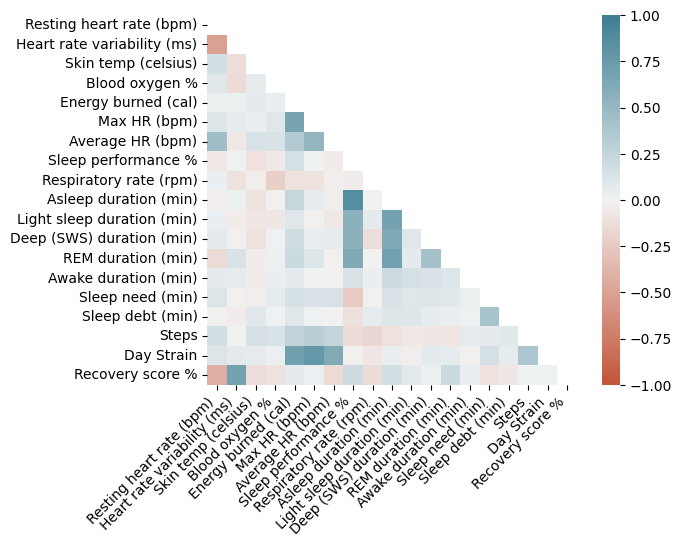

In [76]:
plot_cor(df)

In [77]:
def drop_cor(df, trsh=0.9):
	# Create correlation matrix
	corr_matrix = df.corr().abs()
	
	# Select upper triangle of correlation matrix
	upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
								k=1).astype(bool))
	
	# Find features with correlation greater than 0.9
	to_drop = [column for column in upper.columns if any(upper[column] > trsh)]
	
	# Drop features 
	df.drop(to_drop, axis=1, inplace=True)

In [78]:
# drop_cor(df)

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_23844/1922740039.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


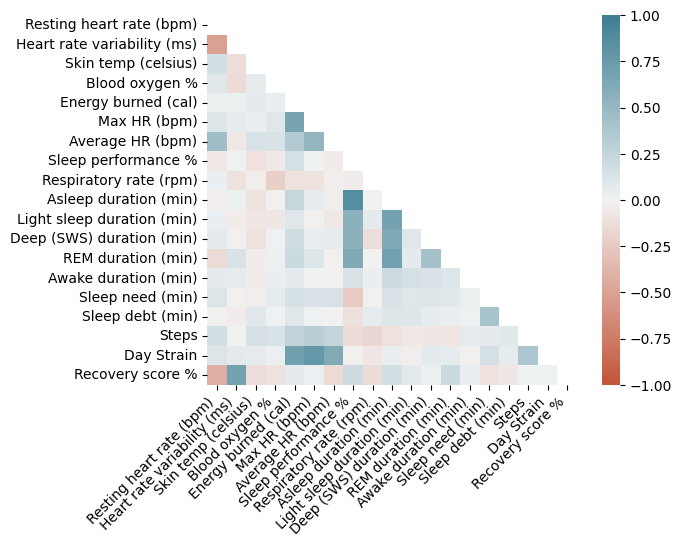

In [79]:
plot_cor(df)

***
### Date Handling

In [80]:
dates = df["Date"].tolist()
dates

[datetime.date(2022, 11, 28),
 datetime.date(2022, 11, 27),
 datetime.date(2022, 11, 26),
 datetime.date(2022, 11, 25),
 datetime.date(2022, 11, 24),
 datetime.date(2022, 11, 23),
 datetime.date(2022, 11, 22),
 datetime.date(2022, 11, 21),
 datetime.date(2022, 11, 20),
 datetime.date(2022, 11, 19),
 datetime.date(2022, 11, 18),
 datetime.date(2022, 11, 17),
 datetime.date(2022, 11, 16),
 datetime.date(2022, 11, 15),
 datetime.date(2022, 11, 14),
 datetime.date(2022, 11, 13),
 datetime.date(2022, 11, 12),
 datetime.date(2022, 11, 11),
 datetime.date(2022, 11, 10),
 datetime.date(2022, 11, 9),
 datetime.date(2022, 11, 8),
 datetime.date(2022, 11, 7),
 datetime.date(2022, 11, 6),
 datetime.date(2022, 11, 5),
 datetime.date(2022, 11, 4),
 datetime.date(2022, 11, 3),
 datetime.date(2022, 11, 2),
 datetime.date(2022, 11, 1),
 datetime.date(2022, 10, 31),
 datetime.date(2022, 10, 30),
 datetime.date(2022, 10, 29),
 datetime.date(2022, 10, 28),
 datetime.date(2022, 10, 27),
 datetime.date(2022

In [81]:
start_date = dates[-2]
end_date = dates[0]

# Create a boolean mask that identifies the rows in the dataframe that fall within the specified date range
mask = (df["Date"] >= start_date) & (df["Date"] <= end_date)

# Use the mask to filter the dataframe and select only the rows that fall within the date range
df_filtered = df[mask]

# Print the unique dates in the filtered dataframe
# print(df_filtered["Date"].unique())


In [82]:
import datetime

In [83]:
date_range = [start_date + datetime.timedelta(days=x) for x in range(0, (end_date-start_date).days)]

# Subtract the list of unique dates from the full range of dates to find the missing dates
missing_dates = [date for date in date_range if date not in df_filtered["Date"].unique()]

# Print the missing dates
print(missing_dates)


[datetime.date(2019, 11, 18), datetime.date(2019, 11, 19), datetime.date(2019, 11, 20), datetime.date(2019, 11, 21), datetime.date(2019, 11, 22), datetime.date(2019, 11, 23), datetime.date(2019, 11, 24), datetime.date(2019, 11, 25), datetime.date(2019, 11, 26), datetime.date(2019, 11, 27), datetime.date(2019, 11, 28), datetime.date(2019, 11, 29), datetime.date(2019, 11, 30), datetime.date(2019, 12, 3), datetime.date(2019, 12, 5), datetime.date(2019, 12, 6), datetime.date(2019, 12, 7), datetime.date(2019, 12, 8), datetime.date(2019, 12, 9), datetime.date(2019, 12, 10), datetime.date(2019, 12, 11), datetime.date(2019, 12, 12), datetime.date(2019, 12, 13), datetime.date(2019, 12, 14), datetime.date(2019, 12, 15), datetime.date(2019, 12, 16), datetime.date(2019, 12, 17), datetime.date(2019, 12, 18), datetime.date(2019, 12, 19), datetime.date(2019, 12, 20), datetime.date(2019, 12, 21), datetime.date(2019, 12, 22), datetime.date(2019, 12, 23), datetime.date(2019, 12, 24), datetime.date(2019,

This looks to be the most recent date when I started using my WHOOP again

In [84]:
start_date = datetime.date(2021, 9, 20)
end_date = datetime.date(2022, 11, 27)

In [85]:
date_range = [start_date + datetime.timedelta(days=x) for x in range(0, (end_date-start_date).days)]

# Subtract the list of unique dates from the full range of dates to find the missing dates
missing_dates = [date for date in date_range if date not in df_filtered["Date"].unique()]

# Print the missing dates
print(len(missing_dates))


29


In [86]:
# Create a boolean mask that identifies the rows in the dataframe that fall within the specified date range
mask = (df["Date"] >= start_date) & (df["Date"] <= end_date)

# Use the mask to filter the dataframe and select only the rows that fall within the date range
df_recent = df[mask]

# Print the unique dates in the filtered dataframe
df_recent.head()

,Date,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Energy burned (cal),Max HR (bpm),Average HR (bpm),Sleep onset,Wake onset,...,Asleep duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Steps,Day Strain,Recovery score %
1,2022-11-27,65.0,47.0,33.74,95.24,1740.0,126.0,76.0,2022-11-27 03:18:18,2022-11-27 10:52:02,...,413.0,218.0,88.0,107.0,34.0,543.0,46.0,3603.0,5.0,36.0
2,2022-11-26,61.0,50.0,33.60,97.17,2651.0,159.0,84.0,2022-11-26 03:51:55,2022-11-26 11:36:43,...,426.0,187.0,109.0,130.0,38.0,535.0,30.0,12908.0,13.5,42.0
3,2022-11-25,58.0,52.0,33.90,97.07,2984.0,159.0,83.0,2022-11-25 03:24:54,2022-11-25 11:58:44,...,435.0,200.0,107.0,128.0,77.0,500.0,23.0,10299.0,14.8,45.0
4,2022-11-24,59.0,56.0,32.10,98.25,2121.0,154.0,79.0,2022-11-24 03:17:20,2022-11-24 11:59:53,...,470.0,244.0,111.0,115.0,52.0,523.0,51.0,5782.0,8.2,53.0
5,2022-11-23,57.0,62.0,33.90,96.79,1984.0,128.0,73.0,2022-11-23 02:31:15,2022-11-23 09:36:37,...,385.0,186.0,103.0,96.0,35.0,494.0,16.0,1112.0,4.9,72.0


In [87]:
df_recent.tail()

,Date,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Energy burned (cal),Max HR (bpm),Average HR (bpm),Sleep onset,Wake onset,...,Asleep duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Steps,Day Strain,Recovery score %
403,2021-09-25,53.0,68.0,NaN,NaN,1483.0,111.0,67.0,2021-09-25 00:15:13,2021-09-25 06:48:45,...,351.0,108.0,102.0,141.0,42.0,477.0,0.0,1783.0,3.5,86.0
404,2021-09-24,54.0,62.0,NaN,NaN,2024.0,152.0,66.0,2021-09-24 00:39:58,2021-09-24 10:30:25,...,525.0,253.0,120.0,152.0,65.0,508.0,33.0,3381.0,6.8,83.0
405,2021-09-23,54.0,53.0,NaN,NaN,1725.0,130.0,67.0,2021-09-23 03:23:20,2021-09-23 11:29:14,...,450.0,175.0,138.0,137.0,35.0,524.0,44.0,637.0,4.9,54.0
406,2021-09-22,57.0,50.0,NaN,NaN,2212.0,161.0,71.0,2021-09-22 02:20:52,2021-09-22 09:47:06,...,409.0,164.0,132.0,113.0,32.0,503.0,23.0,899.0,8.1,50.0
407,2021-09-21,57.0,54.0,NaN,NaN,2134.0,135.0,66.0,2021-09-21 02:15:20,2021-09-21 10:28:00,...,451.0,167.0,109.0,175.0,41.0,500.0,28.0,645.0,8.4,60.0


***
### NaN Handling

In [88]:
df_recent.columns

Index(['Date', 'Resting heart rate (bpm)', 'Heart rate variability (ms)',
       'Skin temp (celsius)', 'Blood oxygen %', 'Energy burned (cal)',
       'Max HR (bpm)', 'Average HR (bpm)', 'Sleep onset', 'Wake onset',
       'Sleep performance %', 'Respiratory rate (rpm)',
       'Asleep duration (min)', 'Light sleep duration (min)',
       'Deep (SWS) duration (min)', 'REM duration (min)',
       'Awake duration (min)', 'Sleep need (min)', 'Sleep debt (min)', 'Steps',
       'Day Strain', 'Recovery score %'],
      dtype='object')

In [89]:
df_recent.describe()

,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Energy burned (cal),Max HR (bpm),Average HR (bpm),Sleep performance %,Respiratory rate (rpm),Asleep duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Steps,Day Strain,Recovery score %
count,405.000000,405.000000,288.000000,288.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,57.007407,62.664198,33.043646,96.523576,2125.143210,150.323457,71.812346,91.375309,13.334568,459.945679,206.407407,112.311111,141.227160,41.943210,491.681481,20.844444,3966.338272,7.876543,68.503704
std,3.045439,9.625195,0.563472,1.524935,289.655094,15.911001,4.318891,10.264684,0.305705,63.178139,39.471815,22.546695,30.061945,21.402536,32.797681,23.943581,3302.809829,2.855777,18.187911
min,50.000000,32.000000,31.310000,87.500000,758.000000,111.000000,62.000000,37.000000,12.700000,195.000000,80.000000,46.000000,28.000000,4.000000,230.000000,0.000000,122.000000,3.500000,1.000000
25%,55.000000,56.000000,32.700000,95.875000,1950.000000,140.000000,68.000000,87.000000,13.100000,428.000000,182.000000,97.000000,123.000000,29.000000,476.000000,0.000000,1543.000000,5.400000,55.000000
50%,57.000000,62.000000,33.030000,96.830000,2060.000000,150.000000,72.000000,94.000000,13.300000,462.000000,205.000000,111.000000,142.000000,39.000000,491.000000,15.000000,3094.000000,7.100000,71.000000
75%,59.000000,68.000000,33.500000,97.430000,2270.000000,160.000000,75.000000,100.000000,13.500000,499.000000,230.000000,127.000000,162.000000,51.000000,509.000000,32.000000,5604.000000,10.100000,83.000000
max,79.000000,94.000000,34.600000,100.000000,3335.000000,199.000000,88.000000,100.000000,15.600000,699.000000,379.000000,179.000000,225.000000,243.000000,610.000000,148.000000,17689.000000,16.000000,99.000000


In [90]:
blood_mode = df_recent['Blood oxygen %'].mode()[0]

In [91]:
skin_mode = df_recent['Skin temp (celsius)'].mode()[0]

In [92]:
df_recent['Blood oxygen %'].replace(np.nan, blood_mode, inplace=True)

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_23844/2876599743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Blood oxygen %'].replace(np.nan, blood_mode, inplace=True)


In [93]:
df_recent['Skin temp (celsius)'].replace(np.nan, skin_mode, inplace=True)

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_23844/3598097984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Skin temp (celsius)'].replace(np.nan, skin_mode, inplace=True)


In [94]:
df_recent.isna().sum()

Date                           0
Resting heart rate (bpm)       0
Heart rate variability (ms)    0
Skin temp (celsius)            0
Blood oxygen %                 0
Energy burned (cal)            0
Max HR (bpm)                   0
Average HR (bpm)               0
Sleep onset                    0
Wake onset                     0
Sleep performance %            0
Respiratory rate (rpm)         0
Asleep duration (min)          0
Light sleep duration (min)     0
Deep (SWS) duration (min)      0
REM duration (min)             0
Awake duration (min)           0
Sleep need (min)               0
Sleep debt (min)               0
Steps                          0
Day Strain                     0
Recovery score %               0
dtype: int64

In [95]:
df_recent.describe()

,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Energy burned (cal),Max HR (bpm),Average HR (bpm),Sleep performance %,Respiratory rate (rpm),Asleep duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Steps,Day Strain,Recovery score %
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,57.007407,62.664198,33.031037,96.661210,2125.143210,150.323457,71.812346,91.375309,13.334568,459.945679,206.407407,112.311111,141.227160,41.943210,491.681481,20.844444,3966.338272,7.876543,68.503704
std,3.045439,9.625195,0.475335,1.303349,289.655094,15.911001,4.318891,10.264684,0.305705,63.178139,39.471815,22.546695,30.061945,21.402536,32.797681,23.943581,3302.809829,2.855777,18.187911
min,50.000000,32.000000,31.310000,87.500000,758.000000,111.000000,62.000000,37.000000,12.700000,195.000000,80.000000,46.000000,28.000000,4.000000,230.000000,0.000000,122.000000,3.500000,1.000000
25%,55.000000,56.000000,32.900000,96.400000,1950.000000,140.000000,68.000000,87.000000,13.100000,428.000000,182.000000,97.000000,123.000000,29.000000,476.000000,0.000000,1543.000000,5.400000,55.000000
50%,57.000000,62.000000,33.000000,97.000000,2060.000000,150.000000,72.000000,94.000000,13.300000,462.000000,205.000000,111.000000,142.000000,39.000000,491.000000,15.000000,3094.000000,7.100000,71.000000
75%,59.000000,68.000000,33.300000,97.130000,2270.000000,160.000000,75.000000,100.000000,13.500000,499.000000,230.000000,127.000000,162.000000,51.000000,509.000000,32.000000,5604.000000,10.100000,83.000000
max,79.000000,94.000000,34.600000,100.000000,3335.000000,199.000000,88.000000,100.000000,15.600000,699.000000,379.000000,179.000000,225.000000,243.000000,610.000000,148.000000,17689.000000,16.000000,99.000000


In [96]:
df_recent["next_recovery"] = df_recent["Recovery score %"].shift(-1)


/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_23844/2100680934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent["next_recovery"] = df_recent["Recovery score %"].shift(-1)


***
### Time Handling in physio

Here I wanted to turn the time of waking up and falling asleep to simple hours so that it would potentially lead to some better insights

In [97]:
df_recent['Sleep onset'] = pd.to_datetime(df_recent['Sleep onset']) 
df_recent['Wake onset'] = pd.to_datetime(df_recent['Wake onset']) 

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_23844/2077816434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Sleep onset'] = pd.to_datetime(df_recent['Sleep onset'])
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_23844/2077816434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Wake onset'] = pd.to_datetime(df_recent['Wake onset'])


In [98]:
df_recent.dtypes

Date                                   object
Resting heart rate (bpm)              float64
Heart rate variability (ms)           float64
Skin temp (celsius)                   float64
Blood oxygen %                        float64
Energy burned (cal)                   float64
Max HR (bpm)                          float64
Average HR (bpm)                      float64
Sleep onset                    datetime64[ns]
Wake onset                     datetime64[ns]
Sleep performance %                   float64
Respiratory rate (rpm)                float64
Asleep duration (min)                 float64
Light sleep duration (min)            float64
Deep (SWS) duration (min)             float64
REM duration (min)                    float64
Awake duration (min)                  float64
Sleep need (min)                      float64
Sleep debt (min)                      float64
Steps                                 float64
Day Strain                            float64
Recovery score %                  

In [99]:
df_recent['Hour sleep'] = df_recent['Sleep onset'].dt.hour
df_recent['Hour wake'] = df_recent['Wake onset'].dt.hour

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_23844/945652353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Hour sleep'] = df_recent['Sleep onset'].dt.hour
/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_23844/945652353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Hour wake'] = df_recent['Wake onset'].dt.hour


In [100]:
df_recent.head()

,Date,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Energy burned (cal),Max HR (bpm),Average HR (bpm),Sleep onset,Wake onset,...,REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Steps,Day Strain,Recovery score %,next_recovery,Hour sleep,Hour wake
1,2022-11-27,65.0,47.0,33.74,95.24,1740.0,126.0,76.0,2022-11-27 03:18:18,2022-11-27 10:52:02,...,107.0,34.0,543.0,46.0,3603.0,5.0,36.0,42.0,3,10
2,2022-11-26,61.0,50.0,33.60,97.17,2651.0,159.0,84.0,2022-11-26 03:51:55,2022-11-26 11:36:43,...,130.0,38.0,535.0,30.0,12908.0,13.5,42.0,45.0,3,11
3,2022-11-25,58.0,52.0,33.90,97.07,2984.0,159.0,83.0,2022-11-25 03:24:54,2022-11-25 11:58:44,...,128.0,77.0,500.0,23.0,10299.0,14.8,45.0,53.0,3,11
4,2022-11-24,59.0,56.0,32.10,98.25,2121.0,154.0,79.0,2022-11-24 03:17:20,2022-11-24 11:59:53,...,115.0,52.0,523.0,51.0,5782.0,8.2,53.0,72.0,3,11
5,2022-11-23,57.0,62.0,33.90,96.79,1984.0,128.0,73.0,2022-11-23 02:31:15,2022-11-23 09:36:37,...,96.0,35.0,494.0,16.0,1112.0,4.9,72.0,69.0,2,9


***
### Pandas Profiling

In [101]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df_recent, title='My WHOOP Data', explorative = True)
# profile

*** 
### EDA of physio

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_23844/1922740039.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


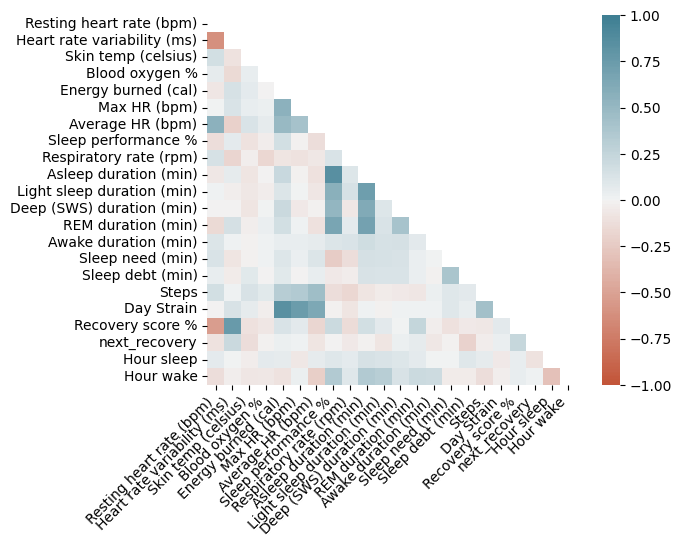

In [102]:
plot_cor(df_recent);

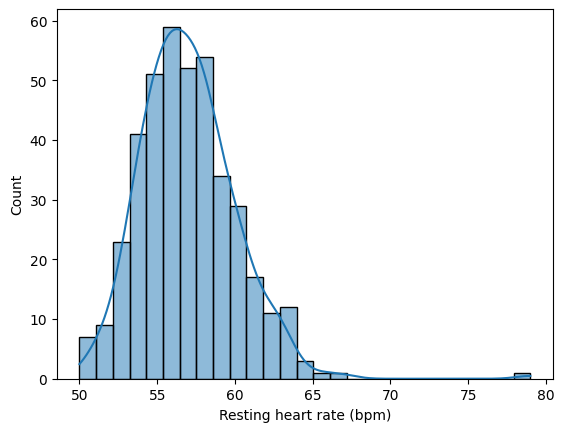

In [103]:
sns.histplot(df_recent['Resting heart rate (bpm)'], kde=True);

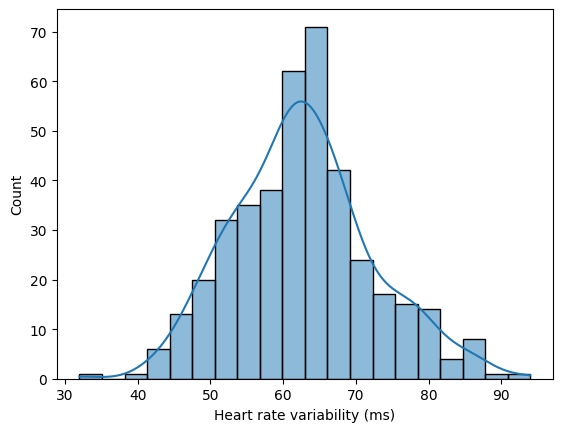

In [104]:
sns.histplot(df_recent['Heart rate variability (ms)'], kde=True);

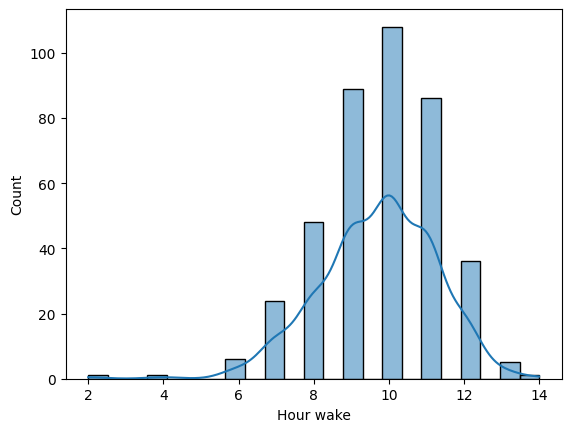

In [105]:
sns.histplot(df_recent['Hour wake'], kde=True);

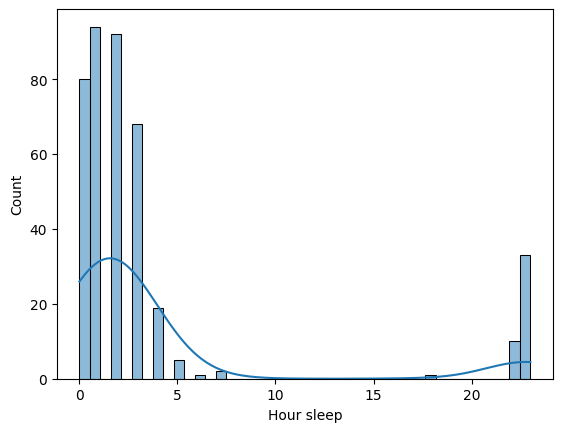

In [106]:
sns.histplot(df_recent['Hour sleep'], kde=True);

In [107]:
df_recent['Adj Hour sleep'] = (df_recent['Hour sleep'] - 6)%12

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_23844/1004411168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Adj Hour sleep'] = (df_recent['Hour sleep'] - 6)%12


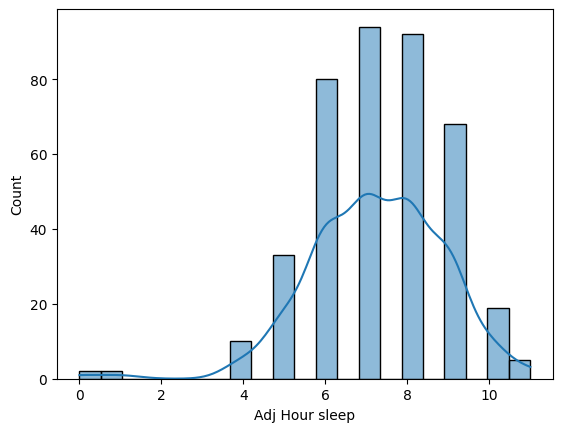

In [108]:
sns.histplot(df_recent['Adj Hour sleep'], kde=True);

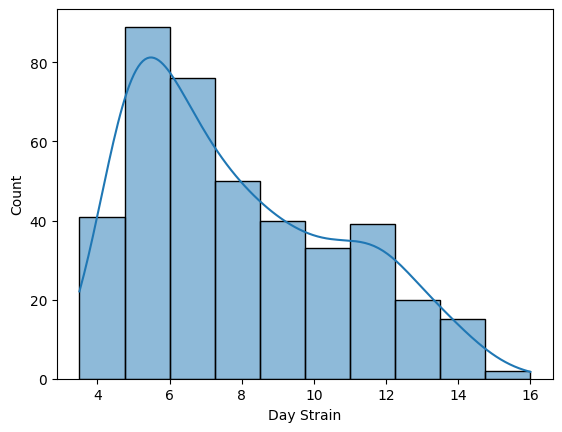

In [109]:
sns.histplot(df_recent['Day Strain'], kde=True);

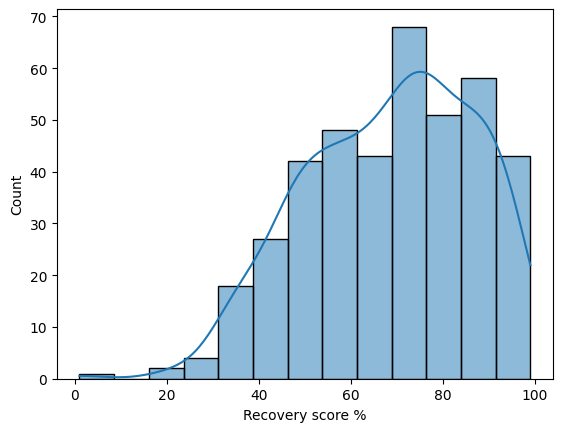

In [110]:
sns.histplot(df_recent['Recovery score %'], kde=True);

<AxesSubplot: xlabel='Resting heart rate (bpm)', ylabel='Recovery score %'>

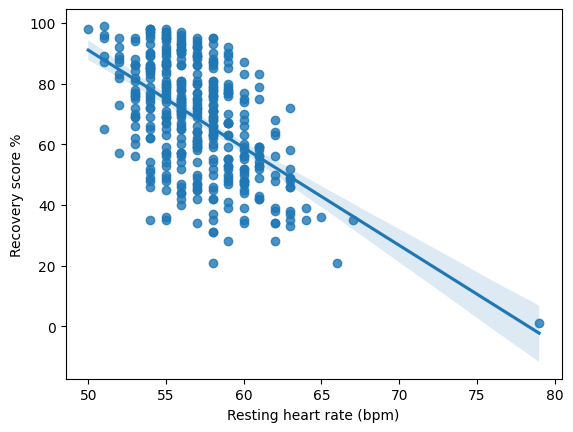

In [111]:
sns.regplot(data=df_recent, y='Recovery score %', x='Resting heart rate (bpm)')

<AxesSubplot: xlabel='Heart rate variability (ms)', ylabel='Recovery score %'>

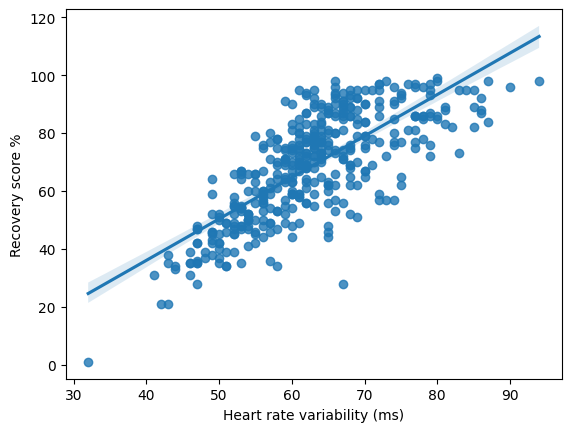

In [112]:
sns.regplot(data=df_recent, y='Recovery score %', x='Heart rate variability (ms)')

<AxesSubplot: xlabel='Average HR (bpm)', ylabel='Day Strain'>

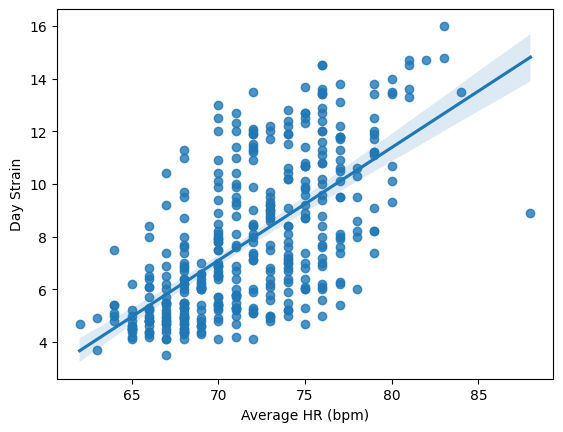

In [113]:
sns.regplot(data=df_recent, y='Day Strain', x='Average HR (bpm)')

In [114]:
df_recent.columns

Index(['Date', 'Resting heart rate (bpm)', 'Heart rate variability (ms)',
       'Skin temp (celsius)', 'Blood oxygen %', 'Energy burned (cal)',
       'Max HR (bpm)', 'Average HR (bpm)', 'Sleep onset', 'Wake onset',
       'Sleep performance %', 'Respiratory rate (rpm)',
       'Asleep duration (min)', 'Light sleep duration (min)',
       'Deep (SWS) duration (min)', 'REM duration (min)',
       'Awake duration (min)', 'Sleep need (min)', 'Sleep debt (min)', 'Steps',
       'Day Strain', 'Recovery score %', 'next_recovery', 'Hour sleep',
       'Hour wake', 'Adj Hour sleep'],
      dtype='object')

<AxesSubplot: xlabel='Steps', ylabel='Day Strain'>

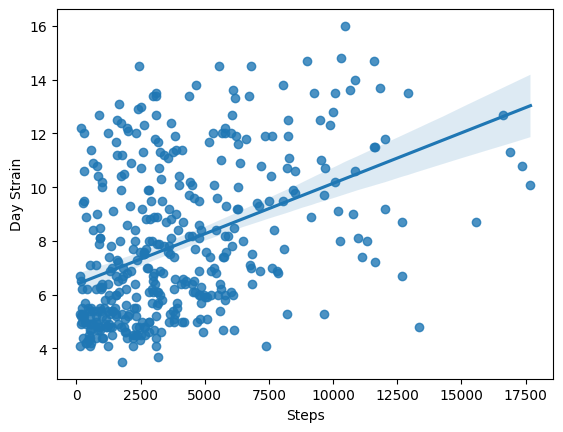

In [115]:
sns.regplot(data=df_recent, y='Day Strain', x='Steps')

*** 
### Time series analysis of RHR and HRV

In [116]:
df_sorted = df_recent.sort_values(by='Date').reset_index()

In [117]:
df_sorted.drop('index', axis=1, inplace=True)

In [118]:
df_sorted["next_recovery"] = df_sorted["Recovery score %"].shift(-1)

In [119]:
df_sorted.head()

,Date,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Energy burned (cal),Max HR (bpm),Average HR (bpm),Sleep onset,Wake onset,...,Awake duration (min),Sleep need (min),Sleep debt (min),Steps,Day Strain,Recovery score %,next_recovery,Hour sleep,Hour wake,Adj Hour sleep
0,2021-09-21,57.0,54.0,33.0,97.0,2134.0,135.0,66.0,2021-09-21 02:15:20,2021-09-21 10:28:00,...,41.0,500.0,28.0,645.0,8.4,60.0,50.0,2,10,8
1,2021-09-22,57.0,50.0,33.0,97.0,2212.0,161.0,71.0,2021-09-22 02:20:52,2021-09-22 09:47:06,...,32.0,503.0,23.0,899.0,8.1,50.0,54.0,2,9,8
2,2021-09-23,54.0,53.0,33.0,97.0,1725.0,130.0,67.0,2021-09-23 03:23:20,2021-09-23 11:29:14,...,35.0,524.0,44.0,637.0,4.9,54.0,83.0,3,11,9
3,2021-09-24,54.0,62.0,33.0,97.0,2024.0,152.0,66.0,2021-09-24 00:39:58,2021-09-24 10:30:25,...,65.0,508.0,33.0,3381.0,6.8,83.0,86.0,0,10,6
4,2021-09-25,53.0,68.0,33.0,97.0,1483.0,111.0,67.0,2021-09-25 00:15:13,2021-09-25 06:48:45,...,42.0,477.0,0.0,1783.0,3.5,86.0,89.0,0,6,6


<AxesSubplot: >

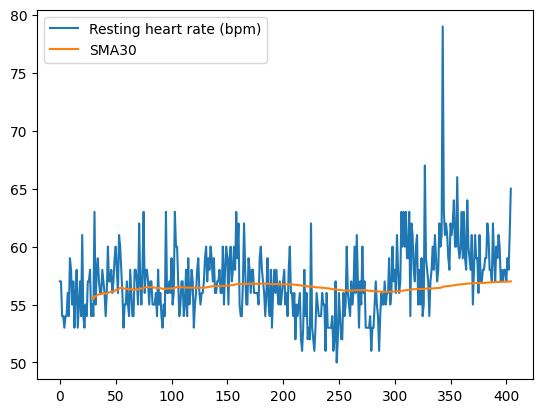

In [120]:
df_sorted['SMA30'] = df_sorted['Resting heart rate (bpm)'].expanding(30).mean()

df_sorted[['Resting heart rate (bpm)', 'SMA30']].plot()


<AxesSubplot: >

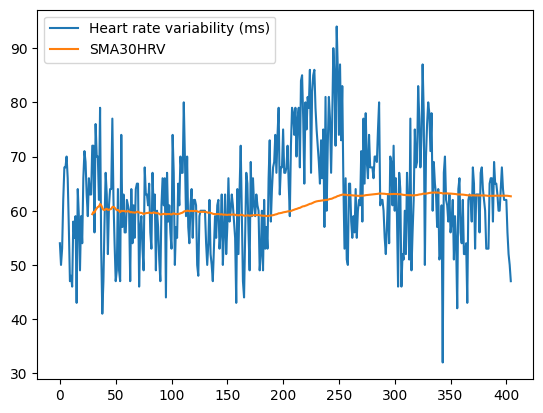

In [121]:
df_sorted['SMA30HRV'] = df_sorted['Heart rate variability (ms)'].expanding(30).mean()

df_sorted[['Heart rate variability (ms)', 'SMA30HRV']].plot()


In [122]:
df_sorted.columns

Index(['Date', 'Resting heart rate (bpm)', 'Heart rate variability (ms)',
       'Skin temp (celsius)', 'Blood oxygen %', 'Energy burned (cal)',
       'Max HR (bpm)', 'Average HR (bpm)', 'Sleep onset', 'Wake onset',
       'Sleep performance %', 'Respiratory rate (rpm)',
       'Asleep duration (min)', 'Light sleep duration (min)',
       'Deep (SWS) duration (min)', 'REM duration (min)',
       'Awake duration (min)', 'Sleep need (min)', 'Sleep debt (min)', 'Steps',
       'Day Strain', 'Recovery score %', 'next_recovery', 'Hour sleep',
       'Hour wake', 'Adj Hour sleep', 'SMA30', 'SMA30HRV'],
      dtype='object')

In [123]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from statsmodels.tools.eval_measures import rmse

In [124]:
result1 = adfuller(df_sorted['Resting heart rate (bpm)'], autolag='AIC')
print(f'ADF Statistic: {result1[0]}')
print(f'p-value: {result1[1]}')

ADF Statistic: -3.008154122673226
p-value: 0.034139892866278373


In [125]:
result2 = kpss(df_sorted['Resting heart rate (bpm)'])
print(f'KPSS Statistic: {result2[0]}')
print(f'p-value: {result2[1]}')

KPSS Statistic: 0.8732771696279304
p-value: 0.01


/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [126]:
result1 = adfuller(df_sorted['Heart rate variability (ms)'], autolag='AIC')
print(f'ADF Statistic: {result1[0]}')
print(f'p-value: {result1[1]}')

ADF Statistic: -4.879375694552661
p-value: 3.8245540314014515e-05


In [127]:
result2 = kpss(df_recent['Heart rate variability (ms)'])
print(f'KPSS Statistic: {result2[0]}')
print(f'p-value: {result2[1]}')

KPSS Statistic: 0.5149470109850081
p-value: 0.03830022275112431


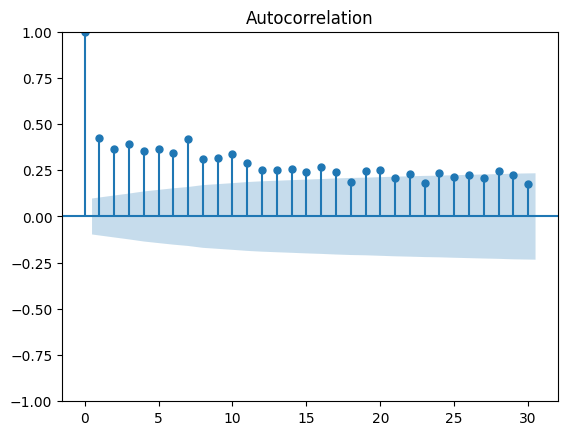

In [128]:
plot_acf(df_sorted['Resting heart rate (bpm)'], lags=30)

# Show the data as a plot (via matplotlib)
plt.show();

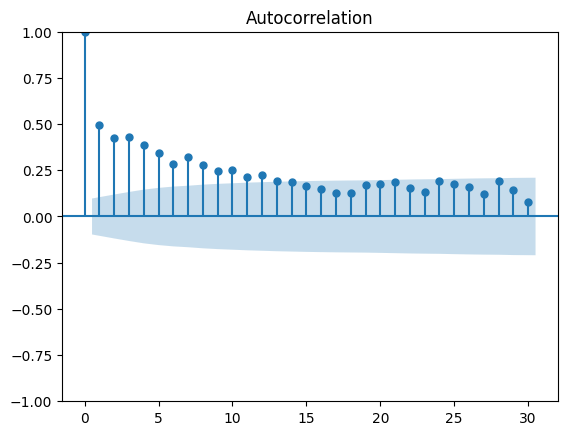

In [129]:
plot_acf(df_recent['Heart rate variability (ms)'], lags=30)

# Show the data as a plot (via matplotlib)
plt.show();

/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


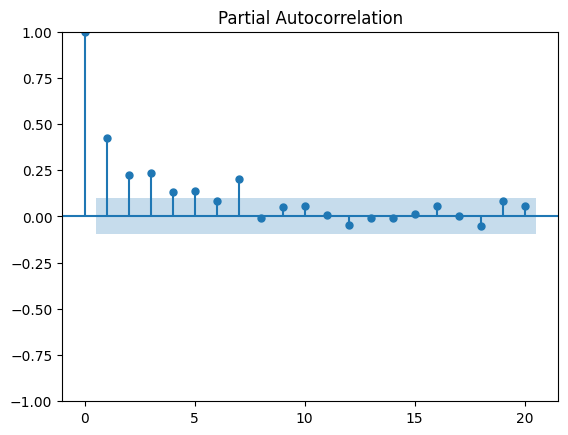

In [130]:
plot_pacf(df_sorted['Resting heart rate (bpm)'], alpha =0.05, lags=20)

plt.show();

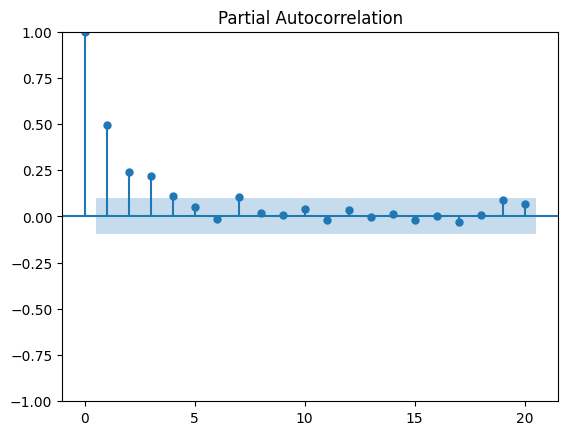

In [131]:
plot_pacf(df_recent['Heart rate variability (ms)'], alpha =0.05, lags=20)

plt.show();

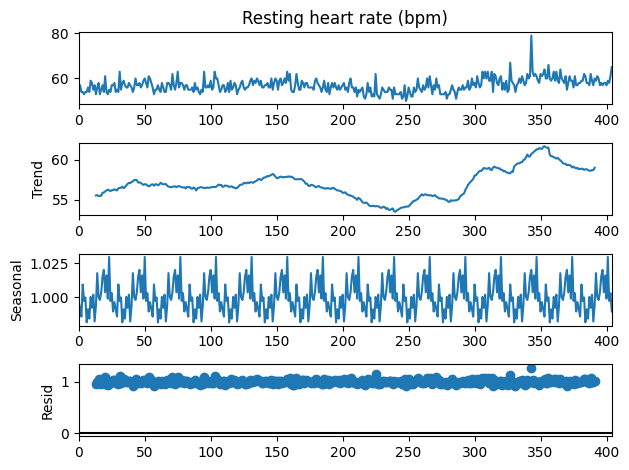

In [132]:
decomp_m = seasonal_decompose(df_sorted['Resting heart rate (bpm)'], model='multiplicative', period=27)

decomp_m.plot()
plt.show()

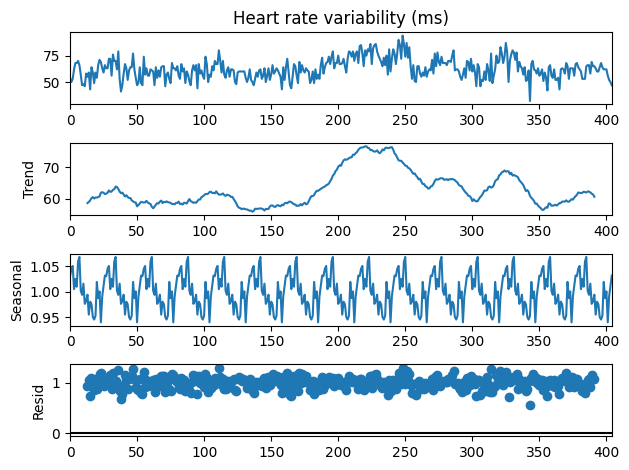

In [133]:
decomp_m = seasonal_decompose(df_sorted['Heart rate variability (ms)'], model='multiplicative', period=27)

decomp_m.plot()
plt.show()

In [134]:
stepwise_fit = pm.auto_arima(df_sorted['Resting heart rate (bpm)'], start_p=0, start_q=0,
                             m=15, max_p=30, max_q=30,
                             seasonal=True,
                             trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True, scoring='mse')  # set to stepwise


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[15] intercept   : AIC=2105.261, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[15] intercept   : AIC=2102.343, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[15] intercept   : AIC=2015.555, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[15] intercept   : AIC=1907.401, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[15]             : AIC=2100.358, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[15] intercept   : AIC=1906.591, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[15] intercept   : AIC=1907.531, Time=0.15 sec


/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,1,1)(1,0,1)[15] intercept   : AIC=1909.190, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[15] intercept   : AIC=1907.564, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[15] intercept   : AIC=1907.472, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[15] intercept   : AIC=2013.814, Time=0.03 sec


/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,0)[15] intercept   : AIC=1906.154, Time=0.14 sec
 ARIMA(1,1,2)(1,0,0)[15] intercept   : AIC=1906.829, Time=0.44 sec


/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,1)[15] intercept   : AIC=1906.685, Time=0.49 sec
 ARIMA(1,1,2)(1,0,1)[15] intercept   : AIC=1908.507, Time=0.79 sec
 ARIMA(2,1,2)(0,0,0)[15] intercept   : AIC=1908.141, Time=0.17 sec


/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,3)(0,0,0)[15] intercept   : AIC=1908.142, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[15] intercept   : AIC=1908.964, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[15] intercept   : AIC=1909.106, Time=0.08 sec


/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(2,1,3)(0,0,0)[15] intercept   : AIC=1910.149, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[15]             : AIC=1904.472, Time=0.07 sec
 ARIMA(1,1,2)(1,0,0)[15]             : AIC=1905.186, Time=0.21 sec


/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,1)[15]             : AIC=1905.048, Time=0.25 sec
 ARIMA(1,1,2)(1,0,1)[15]             : AIC=1906.876, Time=0.44 sec
 ARIMA(0,1,2)(0,0,0)[15]             : AIC=1905.808, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[15]             : AIC=1905.900, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[15]             : AIC=1906.454, Time=0.10 sec


/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: inval

 ARIMA(1,1,3)(0,0,0)[15]             : AIC=1906.455, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[15]             : AIC=1904.886, Time=0.02 sec
 ARIMA(0,1,3)(0,0,0)[15]             : AIC=1907.265, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[15]             : AIC=1907.407, Time=0.04 sec


/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,3)(0,0,0)[15]             : AIC=1906.056, Time=0.29 sec

Best model:  ARIMA(1,1,2)(0,0,0)[15]          
Total fit time: 5.421 seconds


In [135]:
opt = ARIMA(df_sorted['Resting heart rate (bpm)'], order=(1,1,2), seasonal_order=(0,0,0,15))
rm_opt = opt.fit()
print(rm_opt.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Resting heart rate (bpm)   No. Observations:                  405
Model:                       ARIMA(1, 1, 2)   Log Likelihood                -948.236
Date:                      Thu, 08 Dec 2022   AIC                           1904.472
Time:                              13:54:28   BIC                           1920.477
Sample:                                   0   HQIC                          1910.808
                                      - 405                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7921      0.184     -4.312      0.000      -1.152      -0.432
ma.L1          0.0025      0.159      0.015      0.988      -0.310       0.315
ma.L

/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [136]:
print(rmse(rm_opt.predict(), df_sorted['Resting heart rate (bpm)']))

3.7942465528503106


In [137]:
df_sorted['Resting heart rate (bpm)'].describe()

count    405.000000
mean      57.007407
std        3.045439
min       50.000000
25%       55.000000
50%       57.000000
75%       59.000000
max       79.000000
Name: Resting heart rate (bpm), dtype: float64

In [138]:
stepwise_fit = pm.auto_arima(df_sorted['Heart rate variability (ms)'], start_p=0, start_q=0,
                             m=15, max_p=30, max_q=30,
                             seasonal=True,
                             trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True, scoring='mse')  # set to stepwise


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[15] intercept   : AIC=2984.292, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[15] intercept   : AIC=2980.584, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[15] intercept   : AIC=2900.076, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[15] intercept   : AIC=2831.023, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[15]             : AIC=2978.585, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[15] intercept   : AIC=2830.010, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[15] intercept   : AIC=2831.227, Time=0.13 sec


/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,1,1)(1,0,1)[15] intercept   : AIC=2831.776, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[15] intercept   : AIC=2830.219, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[15] intercept   : AIC=2830.250, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[15] intercept   : AIC=2898.087, Time=0.03 sec


/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: inval

 ARIMA(1,1,2)(0,0,0)[15] intercept   : AIC=2834.008, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[15]             : AIC=2828.015, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[15]             : AIC=2829.231, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[15]             : AIC=2829.027, Time=0.07 sec


/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,1,1)(1,0,1)[15]             : AIC=2829.780, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[15]             : AIC=2828.222, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[15]             : AIC=2828.254, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[15]             : AIC=2896.089, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[15]             : AIC=2829.743, Time=0.15 sec

Best model:  ARIMA(0,1,1)(0,0,0)[15]          
Total fit time: 1.769 seconds


/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


In [139]:
opthrv = ARIMA(df_sorted['Heart rate variability (ms)'], order=(0,1,1), seasonal_order=(0,0,0,15))
rm_opt_hrv = opthrv.fit()
print(rm_opt_hrv.summary())

                                    SARIMAX Results                                    
Dep. Variable:     Heart rate variability (ms)   No. Observations:                  405
Model:                          ARIMA(0, 1, 1)   Log Likelihood               -1412.007
Date:                         Thu, 08 Dec 2022   AIC                           2828.015
Time:                                 13:54:30   BIC                           2836.018
Sample:                                      0   HQIC                          2831.183
                                         - 405                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7218      0.031    -23.102      0.000      -0.783      -0.661
sigma2        63.4616      4.279     14.833      0.000     

In [140]:
print(rmse(rm_opt_hrv.predict(), df_sorted['Heart rate variability (ms)']))

8.399795761967422


In [141]:
df_sorted['Heart rate variability (ms)'].describe()

count    405.000000
mean      62.664198
std        9.625195
min       32.000000
25%       56.000000
50%       62.000000
75%       68.000000
max       94.000000
Name: Heart rate variability (ms), dtype: float64

In [142]:
rm_opt.forecast(steps=20)

405    59.821831
406    59.475290
407    59.749768
408    59.532368
409    59.704560
410    59.568175
411    59.676199
412    59.590638
413    59.658406
414    59.604731
415    59.647245
416    59.613571
417    59.640242
418    59.619118
419    59.635849
420    59.622597
421    59.633094
422    59.624780
423    59.631365
424    59.626149
Name: predicted_mean, dtype: float64

In [143]:
rm_opt_hrv.forecast(steps=20)

405    53.549658
406    53.549658
407    53.549658
408    53.549658
409    53.549658
410    53.549658
411    53.549658
412    53.549658
413    53.549658
414    53.549658
415    53.549658
416    53.549658
417    53.549658
418    53.549658
419    53.549658
420    53.549658
421    53.549658
422    53.549658
423    53.549658
424    53.549658
Name: predicted_mean, dtype: float64

***
### Recovery Regression

In [144]:
# from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

#### Next day recovery prediction

In [145]:
df_sorted["next_sleep"] = df_sorted['Asleep duration (min)'].shift(-1)
df_sorted = df_sorted[df_sorted['next_recovery'].notna()]
df_sorted = df_sorted[df_sorted['Asleep duration (min)'].notna()]
X = df_sorted.drop(['next_recovery', 'Sleep onset', 'Wake onset', 'Date'], axis = 1)
y = df_sorted['next_recovery']

In [146]:
X.fillna(method='backfill', inplace=True)

In [147]:
X.isna().sum()

Resting heart rate (bpm)       0
Heart rate variability (ms)    0
Skin temp (celsius)            0
Blood oxygen %                 0
Energy burned (cal)            0
Max HR (bpm)                   0
Average HR (bpm)               0
Sleep performance %            0
Respiratory rate (rpm)         0
Asleep duration (min)          0
Light sleep duration (min)     0
Deep (SWS) duration (min)      0
REM duration (min)             0
Awake duration (min)           0
Sleep need (min)               0
Sleep debt (min)               0
Steps                          0
Day Strain                     0
Recovery score %               0
Hour sleep                     0
Hour wake                      0
Adj Hour sleep                 0
SMA30                          0
SMA30HRV                       0
next_sleep                     0
dtype: int64

In [148]:
X.dtypes

Resting heart rate (bpm)       float64
Heart rate variability (ms)    float64
Skin temp (celsius)            float64
Blood oxygen %                 float64
Energy burned (cal)            float64
Max HR (bpm)                   float64
Average HR (bpm)               float64
Sleep performance %            float64
Respiratory rate (rpm)         float64
Asleep duration (min)          float64
Light sleep duration (min)     float64
Deep (SWS) duration (min)      float64
REM duration (min)             float64
Awake duration (min)           float64
Sleep need (min)               float64
Sleep debt (min)               float64
Steps                          float64
Day Strain                     float64
Recovery score %               float64
Hour sleep                       int64
Hour wake                        int64
Adj Hour sleep                   int64
SMA30                          float64
SMA30HRV                       float64
next_sleep                     float64
dtype: object

In [149]:
SFM = SelectFromModel(estimator=RandomForestClassifier())
sel = SFM.fit(X, y)
selected_feat= X.columns[(sel.get_support())]
print(selected_feat)

Index(['Heart rate variability (ms)', 'Skin temp (celsius)', 'Blood oxygen %',
       'Energy burned (cal)', 'Max HR (bpm)', 'Asleep duration (min)',
       'Light sleep duration (min)', 'Deep (SWS) duration (min)',
       'REM duration (min)', 'Awake duration (min)', 'Sleep need (min)',
       'Steps', 'Day Strain', 'Recovery score %', 'SMA30', 'SMA30HRV',
       'next_sleep'],
      dtype='object')


In [150]:
X = X.loc[: , selected_feat]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

In [152]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [153]:
y.head()

0    50.0
1    54.0
2    83.0
3    86.0
4    89.0
Name: next_recovery, dtype: float64

<AxesSubplot: >

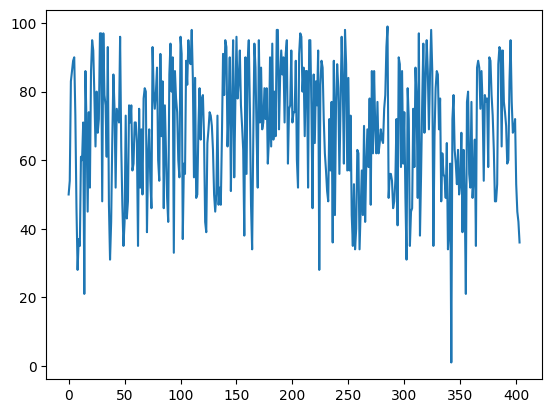

In [154]:
y.plot()

In [155]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

tpot.export('tpot_ml_pipeline.py')

/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


                                                                              
Generation 1 - Current best internal CV score: -307.47310215063624
                                                                              
Generation 2 - Current best internal CV score: -307.47310215063624
                                                                              
Generation 3 - Current best internal CV score: -307.47310215063624
                                                                              
Generation 4 - Current best internal CV score: -307.19222912682227
                                                                              
Generation 5 - Current best internal CV score: -307.19222912682227
                                                                              
Best pipeline: RandomForestRegressor(SGDRegressor(ElasticNetCV(input_matrix, l1_ratio=0.75, tol=0.01), alpha=0.001, eta0=0.01, fit_intercept=False, l1_ratio=0.25, learning_rate=invscaling, lo

/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/sklearn/metrics/_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(


In [156]:
from sklearn.linear_model import LassoLarsCV, ElasticNetCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import make_pipeline
from tpot.builtins import StackingEstimator
from sklearn.preprocessing import MinMaxScaler


In [157]:
exported_pipeline = make_pipeline(
    MinMaxScaler(),
    LassoLarsCV(normalize=False)
)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, results))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, results))

Mean squared error: 284.80
Coefficient of determination: 0.07


In [158]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [-8.70986807e-02  1.05642045e+00 -1.37939635e-01  7.24641552e-03
  7.22877180e-02 -1.00455983e-02 -6.05901267e-03  4.14122358e-02
 -4.53988214e-02  1.27994907e-02 -1.65074132e-02 -2.86074965e-04
 -2.06895881e+00  2.84654364e-01  8.68278939e+00 -1.16378305e+00
  5.31289440e-02]
Mean squared error: 301.49
Coefficient of determination: 0.01


In [163]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [160]:
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 300.29
Coefficient of determination: 0.02


In [162]:
from sklearn.ensemble import RandomForestRegressor

In [164]:
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive


In [168]:
training_features, testing_features, training_target, testing_target = \
            train_test_split(X, y, random_state=42)

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.75, tol=0.01)),
    StackingEstimator(estimator=SGDRegressor(alpha=0.001, eta0=0.01, fit_intercept=False, l1_ratio=0.25, learning_rate="invscaling", loss="squared_error", penalty="elasticnet", power_t=100.0)),
    RandomForestRegressor(bootstrap=True, max_features=0.4, min_samples_leaf=16, min_samples_split=14, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Mean squared error: 300.29
Coefficient of determination: 0.02


/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(


#### Current day recovery

In [171]:
X = df_sorted.drop(['Recovery score %', 'next_sleep', 'next_recovery', 'Sleep onset', 'Wake onset', 'Date'], axis = 1)
y = df_sorted['Recovery score %']

In [172]:
X.fillna(method='backfill', inplace=True)

In [173]:
X.isna().sum()

Resting heart rate (bpm)       0
Heart rate variability (ms)    0
Skin temp (celsius)            0
Blood oxygen %                 0
Energy burned (cal)            0
Max HR (bpm)                   0
Average HR (bpm)               0
Sleep performance %            0
Respiratory rate (rpm)         0
Asleep duration (min)          0
Light sleep duration (min)     0
Deep (SWS) duration (min)      0
REM duration (min)             0
Awake duration (min)           0
Sleep need (min)               0
Sleep debt (min)               0
Steps                          0
Day Strain                     0
Hour sleep                     0
Hour wake                      0
Adj Hour sleep                 0
SMA30                          0
SMA30HRV                       0
dtype: int64

In [174]:
X.dtypes

Resting heart rate (bpm)       float64
Heart rate variability (ms)    float64
Skin temp (celsius)            float64
Blood oxygen %                 float64
Energy burned (cal)            float64
Max HR (bpm)                   float64
Average HR (bpm)               float64
Sleep performance %            float64
Respiratory rate (rpm)         float64
Asleep duration (min)          float64
Light sleep duration (min)     float64
Deep (SWS) duration (min)      float64
REM duration (min)             float64
Awake duration (min)           float64
Sleep need (min)               float64
Sleep debt (min)               float64
Steps                          float64
Day Strain                     float64
Hour sleep                       int64
Hour wake                        int64
Adj Hour sleep                   int64
SMA30                          float64
SMA30HRV                       float64
dtype: object

In [175]:
SFM = SelectFromModel(estimator=RandomForestClassifier())
sel = SFM.fit(X, y)
selected_feat= X.columns[(sel.get_support())]
print(selected_feat)

Index(['Heart rate variability (ms)', 'Energy burned (cal)', 'Max HR (bpm)',
       'Asleep duration (min)', 'Light sleep duration (min)',
       'Deep (SWS) duration (min)', 'REM duration (min)',
       'Awake duration (min)', 'Sleep need (min)', 'Steps', 'Day Strain',
       'SMA30', 'SMA30HRV'],
      dtype='object')


In [176]:
X = X.loc[: , selected_feat]

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [189]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [190]:
y.head()

0    60.0
1    50.0
2    54.0
3    83.0
4    86.0
Name: Recovery score %, dtype: float64

<AxesSubplot: >

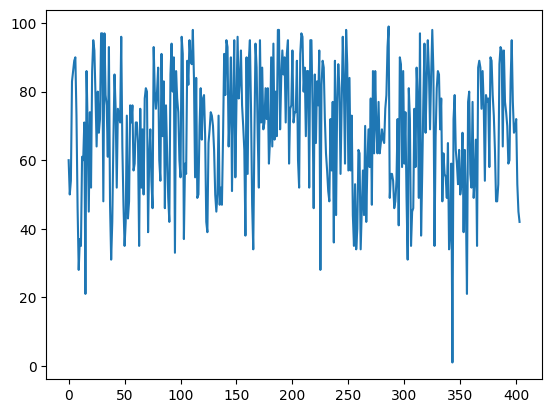

In [191]:
y.plot()

In [192]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

tpot.export('tpot_ml_pipeline1.py')

                                                                              
Generation 1 - Current best internal CV score: -75.66378362547798
                                                                              
Generation 2 - Current best internal CV score: -70.01234638952245
                                                                              
Generation 3 - Current best internal CV score: -70.01234638952245
                                                                              
Generation 4 - Current best internal CV score: -70.01234638952245
                                                                              
Generation 5 - Current best internal CV score: -70.01234638952245
                                                                              
Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=6, min_child_weight=14, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9500000000000001, verbosity=0)
-6

/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/sklearn/metrics/_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [193]:
from sklearn.linear_model import LassoLarsCV, ElasticNetCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import make_pipeline
from tpot.builtins import StackingEstimator
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

In [182]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV
from tpot.builtins import StackingEstimator

In [194]:
exported_pipeline = XGBRegressor(learning_rate=0.1, max_depth=6, min_child_weight=14, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.9500000000000001, verbosity=0)
exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, results))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, results))


Mean squared error: 65.33
Coefficient of determination: 0.80


In [196]:
reg = LassoLarsCV()
regi = reg.fit(X_train, y_train) 
y_pred = regi.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Mean squared error: 116.66
Coefficient of determination: 0.65


/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
